In [1]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
# from mpl_toolkits import mplot3d
import time
from klepto.archives import dir_archive

In [2]:
from rawFLIR_polarization_data_extraction import *
from slope2height import *

In [3]:
NUM_IMAGES=1
BEDFORMS = ['corals', 'canopy', 'rocks', 'dunes']
flow_speeds = ['fast', 'med', 'slow']
submergences = ['Deep', 'Intermed', 'Shallow']

# choose the data
bed_idx = 0
flow_idx = 0
submergence_idx = 2 # change this
TEST = 4

# SET the data variables
FLOW_SPEED = flow_speeds[flow_idx]
SUBMERGENCE = submergences[submergence_idx]
BEDFORM = BEDFORMS[bed_idx]

# source data folders

# for the bedform flow case, uncomment the line below
# file_location = "../FLIR_Camera/{}_{}Flow_{}H_test{}_centeredCam_flume_LookAngle_35Deg".format(BEDFORM, FLOW_SPEED, SUBMERGENCE, TEST)
# for the wind case use line below:
# file_location  = "../TOSHIBA_Drive/saksham_polar_cam_FLIR/corals_fastFlow_ShallowH_test4_centeredCam_247cmDownstreamUpperROI_flume_LookAngle_35Deg"
file_location =  "../TOSHIBA_Drive/saksham_polar_cam_FLIR/boils_3fps_25Pump_25cmH_industrialHoseJet"
ref_image_name = 'reference.tiff'
save_location =  "../TOSHIBA_Drive/saksham_polar_cam_FLIR"
dark_files_location = "../FLIR_Camera/dark_imgs"
flat_files_location = "../FLIR_Camera/flat_imgs"
klepto_saved_data_origin = 'klepto_bulk_data_saves' 
print(file_location)

../TOSHIBA_Drive/saksham_polar_cam_FLIR/boils_3fps_25Pump_25cmH_industrialHoseJet


In [4]:
flat_field_correction_params = flat_field_params(dark_files_location, flat_files_location)

In [5]:
im_theta1, im_phi1 = theta_phi(ref_image_name, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               num_images= NUM_IMAGES, correction_angle=0,
                               flat_field_correction_params = flat_field_correction_params)

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03398013114929199 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.042975425720214844 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:227: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.59680414199829 seconds
False
AoLP time:  0.04697084426879883 s


In [6]:
def get_median(filter_area):
    res = np.median(filter_area)
    return res

In [7]:
theta_ref = np.zeros_like(im_theta1)
phi_ref = np.zeros_like(im_phi1)

height = im_theta1.shape[0]
width = im_theta1.shape[1]

for row in range(1, height - 1):
    for column in range(1, width - 1):
        filter_area = im_theta1[row - 1:row + 2, column - 1:column + 2]
        theta_ref[row][column] = get_median(filter_area)

In [8]:
for row in range(1, height - 1):
    for column in range(1, width - 1):
        filter_area = im_phi1[row - 1:row + 2, column - 1:column + 2]
        phi_ref[row][column] = get_median(filter_area)

In [9]:
print(np.mean(theta_ref), np.median(theta_ref))
print(np.mean(phi_ref), np.median(phi_ref))

25.120045420153104 25.03435469909436
90.47274450570384 90.91576405773888


<Figure size 432x288 with 0 Axes>

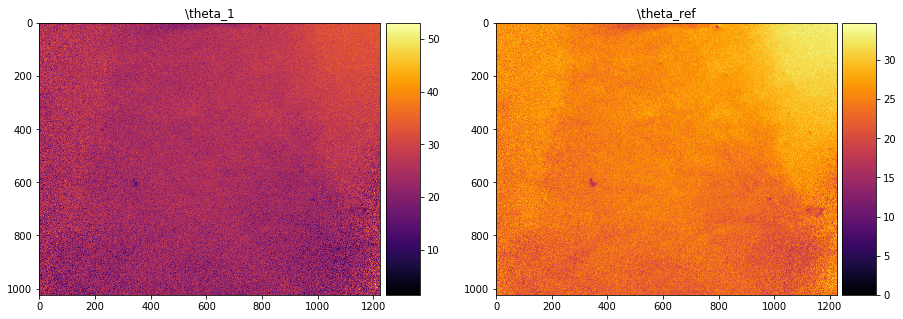

<Figure size 432x288 with 0 Axes>

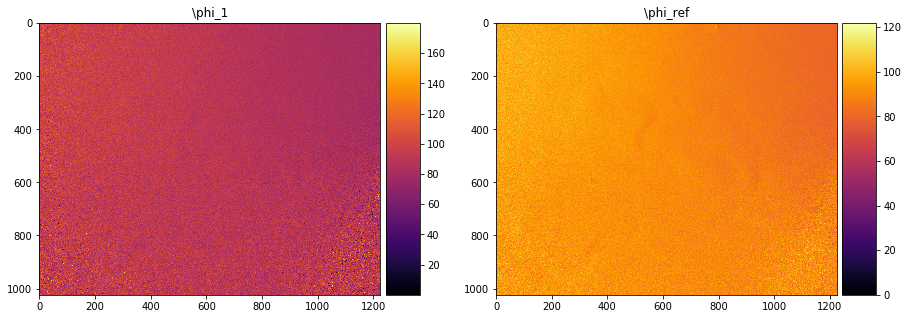

In [10]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize =(15, 5)) 

ax0.set_title("\\theta_1", fontsize=  12)
im0 = ax0.imshow(im_theta1, cmap = plt.cm.inferno, aspect='auto')#\
#                 ,extent=(-N // 2, N // 2, -M // 2, M // 2))#, vmin = 0, vmax = 255)
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="10%", pad=0.08)
cbar0 = plt.colorbar(im0, cax=cax0)


ax1.set_title("\\theta_ref", fontsize=  12)
im1 = ax1.imshow(theta_ref, cmap = plt.cm.inferno, aspect='auto')#\
#                 , extent=(-N // 2, N // 2, -M // 2, M // 2)) # vmin = -5, vmax = 5, 
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.08)
cbar1 = plt.colorbar(im1, cax=cax1)

plt.show()

plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize =(15, 5)) 

ax0.set_title("\\phi_1", fontsize=  12)
im0 = ax0.imshow(im_phi1, cmap = plt.cm.inferno, aspect='auto')#\
#                 ,extent=(-N // 2, N // 2, -M // 2, M // 2))#, vmin = 0, vmax = 255)
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="10%", pad=0.08)
cbar0 = plt.colorbar(im0, cax=cax0)


ax1.set_title("\\phi_ref", fontsize=  12)
im1 = ax1.imshow(phi_ref, cmap = plt.cm.inferno, aspect='auto')#\
#                 , extent=(-N // 2, N // 2, -M // 2, M // 2)) # vmin = -5, vmax = 5, 
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.08)
cbar1 = plt.colorbar(im1, cax=cax1)

plt.show()

# SAVE the height, slope, raw data maps

In [11]:
filenames = os.listdir(file_location)
filenames = [f for f in filenames if f.endswith('.tiff')]
filenames.remove(ref_image_name) 
# print(filenames[-50:])
filenames = filenames[:900]
NUM_FRAMES = len(filenames)
print(NUM_FRAMES)

900


In [12]:
for k in tqdm(range(4)):
    # set the frames to be processed and save locations
    SUBFOLDER = k+1
    
    # for the bedform case uncomment the line below
    #     data_foldername = "{}_{}Flow_{}H_test{}_subFolder{}".format(BEDFORM, FLOW_SPEED, SUBMERGENCE, TEST, SUBFOLDER)
    # for the wind case use line below:
#     data_foldername = "flat_noFlow_D27pt2cm_fan_excitement_subFolder{}".format(SUBFOLDER)
#     data_foldername = "corals_fastFlow_ShallowH_test4_centeredCam_247cmDownstreamUpperROI_flume_LookAngle_35Deg_subFolder{}".format(SUBFOLDER)
    data_foldername = "boils_3fps_MedianFilteredRef_25Pump_25cmH_industrialHoseJet_subFolder{}".format(SUBFOLDER)
    if k!=3:
        files = filenames[k*NUM_FRAMES//4: (k+1)*NUM_FRAMES//4]
    else:
        files = filenames[k*NUM_FRAMES//4:]
        
    all_height_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(files)))
    all_sx_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(files)))
    all_sy_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(files)))
    all_raw_frames_0filter = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(files)))

    i=-1
    for filename2 in tqdm(files): #
        i+=1
        im_theta2, im_phi2 = theta_phi(filename2, file_location,
                                   material = 'water',
                                   flat_field_correct = 1,
                                   gaussian_smoothing_sigma = 0,
                                   num_images= NUM_IMAGES, correction_angle=0,
                                   flat_field_correction_params = flat_field_correction_params)

        raw_img2 = cv2.imread(os.path.join(file_location, filename2))

        # get slopes and height maps
        s_x = np.tan(np.radians((im_theta2 - theta_ref))) # instead use theta of 30; previously: theta_ref = im_theta1 
        s_y = np.tan(np.radians((im_phi2 - phi_ref))) # instead of reference image previously: phi_ref = im_phi1
        s_hat_x, s_hat_y = slopeFieldFFT(s_x, s_y, suppress_fig = 1)
        height_map = slope2height(s_hat_x, s_hat_y)
        all_height_maps[:,:,i] = height_map
        all_sx_maps[:,:,i] = s_x
        all_sy_maps[:,:,i] = s_y
        all_raw_frames_0filter[:,:,i] = raw_img2[::2,::2,0]

    del im_theta2, s_x, s_y, s_hat_x, s_hat_y, height_map, raw_img2, im_phi2
    
    # Collate the data into a dict
    all_data_dict = {'all_height_maps': all_height_maps, 'all_sx_maps': all_sx_maps, \
                     'all_sy_maps':all_sy_maps, 'all_raw_frames_0filter':all_raw_frames_0filter}

    # Save using Klepto -- not pickle : directly to disk -- not memory intensive
    tic = time.time()
    demo = dir_archive(os.path.join(save_location, klepto_saved_data_origin, data_foldername), {}, \
                       serialized=True, cached=False)
    demo['all_height_maps'] = all_height_maps
    demo['all_sx_maps'] = all_sx_maps
    demo['all_sy_maps'] = all_sy_maps
    demo['all_raw_frames_0filter'] = all_raw_frames_0filter
    toc = time.time()
    print('time taken = ', toc - tic)
    demo.dump()
    
    # Empty some space
    del all_data_dict, all_height_maps, all_sx_maps, all_sy_maps, all_raw_frames_0filter, files, demo

  0%|          | 0/225 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259859561920166 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.045926094055176 seconds
False
AoLP time:  0.04297518730163574 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part

  0%|          | 1/225 [00:25<1:35:31, 25.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.134495496749878 seconds
False
AoLP time:  0.0419769287109375 s



  1%|          | 2/225 [00:48<1:32:12, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026987075805664062 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.548582077026367 seconds
False
AoLP time:  0.04297924041748047 s



  1%|▏         | 3/225 [01:13<1:31:34, 24.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.17786145210266 seconds
False
AoLP time:  0.04397463798522949 s



  2%|▏         | 4/225 [01:37<1:30:42, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981613159179688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297447204589844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.330300331115723 seconds
False
AoLP time:  0.043975830078125 s



  2%|▏         | 5/225 [02:01<1:29:57, 24.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.811220169067383 seconds
False
AoLP time:  0.04397726058959961 s



  3%|▎         | 6/225 [02:25<1:28:29, 24.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0319828987121582 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997802734375 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.25132989883423 seconds
False
AoLP time:  0.045973777770996094 s



  3%|▎         | 7/225 [02:49<1:28:03, 24.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0399775505065918 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.37681484222412 seconds
False
AoLP time:  0.04497528076171875 s



  4%|▎         | 8/225 [03:12<1:26:36, 23.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398681640625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498125076293945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.32444429397583 seconds
False
AoLP time:  0.04197549819946289 s



  4%|▍         | 9/225 [03:35<1:24:13, 23.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.784547567367554 seconds
False
AoLP time:  0.04097604751586914 s



  4%|▍         | 10/225 [03:56<1:21:51, 22.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398681640625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03698086738586426 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.99927520751953 seconds
False
AoLP time:  0.04497218132019043 s



  5%|▍         | 11/225 [04:19<1:21:20, 22.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498077392578125 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.152339935302734 seconds
False
AoLP time:  0.04197525978088379 s



  5%|▌         | 12/225 [04:43<1:22:25, 23.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.4777991771698 seconds
False
AoLP time:  0.04297590255737305 s



  6%|▌         | 13/225 [05:07<1:23:08, 23.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.72985553741455 seconds
False
AoLP time:  0.04697227478027344 s



  6%|▌         | 14/225 [05:32<1:23:57, 23.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982255935668945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.02020001411438 seconds
False
AoLP time:  0.05296921730041504 s



  7%|▋         | 15/225 [05:56<1:23:25, 23.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.53349781036377 seconds
False
AoLP time:  0.04097580909729004 s



  7%|▋         | 16/225 [06:19<1:22:30, 23.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986173629760742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982017517089844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.03547763824463 seconds
False
AoLP time:  0.04098105430603027 s



  8%|▊         | 17/225 [06:41<1:20:08, 23.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977861404418945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.067380905151367 seconds
False
AoLP time:  0.039977312088012695 s



  8%|▊         | 18/225 [07:03<1:18:24, 22.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030980825424194336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.481301307678223 seconds
False
AoLP time:  0.05096864700317383 s



  8%|▊         | 19/225 [07:26<1:18:52, 22.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.639711141586304 seconds
False
AoLP time:  0.04697227478027344 s



  9%|▉         | 20/225 [07:51<1:20:16, 23.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983333587646484 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982017517089844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.623687744140625 seconds
False
AoLP time:  0.03997611999511719 s



  9%|▉         | 21/225 [08:14<1:19:44, 23.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.95503330230713 seconds
False
AoLP time:  0.04397416114807129 s



 10%|▉         | 22/225 [08:40<1:22:04, 24.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.272742748260498 seconds
False
AoLP time:  0.04997110366821289 s



 10%|█         | 23/225 [09:04<1:21:27, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.20693349838257 seconds
False
AoLP time:  0.05296921730041504 s



 11%|█         | 24/225 [09:28<1:20:48, 24.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.543396472930908 seconds
False
AoLP time:  0.04097604751586914 s



 11%|█         | 25/225 [09:51<1:18:34, 23.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.77158761024475 seconds
False
AoLP time:  0.03895831108093262 s



 12%|█▏        | 26/225 [10:12<1:16:05, 22.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098273277282715 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.68980622291565 seconds
False
AoLP time:  0.04097747802734375 s



 12%|█▏        | 27/225 [10:34<1:14:09, 22.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.707956314086914 seconds
False
AoLP time:  0.04197525978088379 s



 12%|█▏        | 28/225 [10:57<1:15:02, 22.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898383140563965 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.78432059288025 seconds
False
AoLP time:  0.046972036361694336 s



 13%|█▎        | 29/225 [11:21<1:15:34, 23.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03603243827819824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.84602165222168 seconds
False
AoLP time:  0.05596756935119629 s



 13%|█▎        | 30/225 [11:46<1:16:38, 23.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.656861066818237 seconds
False
AoLP time:  0.04197549819946289 s



 14%|█▍        | 31/225 [12:09<1:16:03, 23.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0354917049407959 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.97822880744934 seconds
False
AoLP time:  0.051084280014038086 s



 14%|█▍        | 32/225 [12:33<1:15:51, 23.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.19832706451416 seconds
False
AoLP time:  0.04997062683105469 s



 15%|█▍        | 33/225 [12:56<1:14:57, 23.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03249335289001465 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.369572639465332 seconds
False
AoLP time:  0.04197359085083008 s



 15%|█▌        | 34/225 [13:18<1:13:15, 23.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.740297555923462 seconds
False
AoLP time:  0.04197430610656738 s



 16%|█▌        | 35/225 [13:40<1:12:18, 22.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.436718940734863 seconds
False
AoLP time:  0.039977073669433594 s



 16%|█▌        | 36/225 [14:04<1:12:26, 23.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.76284646987915 seconds
False
AoLP time:  0.04297375679016113 s



 16%|█▋        | 37/225 [14:27<1:12:45, 23.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897809982299805 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.295110940933228 seconds
False
AoLP time:  0.04896879196166992 s



 17%|█▋        | 38/225 [14:51<1:13:05, 23.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.24180817604065 seconds
False
AoLP time:  0.04597306251525879 s



 17%|█▋        | 39/225 [15:15<1:13:08, 23.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985862731933594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.31375813484192 seconds
False
AoLP time:  0.04097437858581543 s



 18%|█▊        | 40/225 [15:39<1:13:07, 23.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.911979913711548 seconds
False
AoLP time:  0.040970802307128906 s



 18%|█▊        | 41/225 [16:02<1:11:44, 23.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298139572143555 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.420716047286987 seconds
False
AoLP time:  0.04197120666503906 s



 19%|█▊        | 42/225 [16:24<1:10:09, 23.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03349018096923828 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.576799154281616 seconds
False
AoLP time:  0.03997373580932617 s



 19%|█▉        | 43/225 [16:46<1:09:08, 22.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.87366819381714 seconds
False
AoLP time:  0.050969600677490234 s



 20%|█▉        | 44/225 [17:10<1:09:42, 23.11s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033979177474975586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.292651176452637 seconds
False
AoLP time:  0.042974233627319336 s



 20%|██        | 45/225 [17:34<1:10:21, 23.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898240089416504 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.353901386260986 seconds
False
AoLP time:  0.04297471046447754 s



 20%|██        | 46/225 [17:59<1:10:29, 23.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.946350812911987 seconds
False
AoLP time:  0.03997635841369629 s



 21%|██        | 47/225 [18:22<1:10:06, 23.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.955986976623535 seconds
False
AoLP time:  0.04495501518249512 s



 21%|██▏       | 48/225 [18:46<1:09:45, 23.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339815616607666 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.19298553466797 seconds
False
AoLP time:  0.040981292724609375 s



 22%|██▏       | 49/225 [19:09<1:08:40, 23.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598285675048828 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.03192663192749 seconds
False
AoLP time:  0.04048418998718262 s



 22%|██▏       | 50/225 [19:30<1:06:48, 22.91s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03799009323120117 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.080559492111206 seconds
False
AoLP time:  0.04297471046447754 s



 23%|██▎       | 51/225 [19:52<1:05:26, 22.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.678401231765747 seconds
False
AoLP time:  0.05396866798400879 s



 23%|██▎       | 52/225 [20:16<1:06:01, 22.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097604751586914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.465928554534912 seconds
False
AoLP time:  0.04097580909729004 s



 24%|██▎       | 53/225 [20:40<1:06:58, 23.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026041269302368164 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033011436462402344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.1327543258667 seconds
False
AoLP time:  0.04896903038024902 s



 24%|██▍       | 54/225 [21:04<1:06:59, 23.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198122978210449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.13843321800232 seconds
False
AoLP time:  0.04495668411254883 s



 24%|██▍       | 55/225 [21:28<1:06:52, 23.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319821834564209 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.192890882492065 seconds
False
AoLP time:  0.0399777889251709 s



 25%|██▍       | 56/225 [21:52<1:06:41, 23.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982255935668945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.113502502441406 seconds
False
AoLP time:  0.039977073669433594 s



 25%|██▌       | 57/225 [22:16<1:06:37, 23.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023987770080566406 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.437002658843994 seconds
False
AoLP time:  0.03897500038146973 s



 26%|██▌       | 58/225 [22:39<1:05:40, 23.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239870548248291 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031980276107788086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.543305158615112 seconds
False
AoLP time:  0.05396747589111328 s



 26%|██▌       | 59/225 [23:03<1:05:50, 23.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697681427001953 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.204639196395874 seconds
False
AoLP time:  0.04097557067871094 s



 27%|██▋       | 60/225 [23:28<1:06:22, 24.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.16130018234253 seconds
False
AoLP time:  0.04097580909729004 s



 27%|██▋       | 61/225 [23:53<1:06:34, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.07521390914917 seconds
False
AoLP time:  0.04297184944152832 s



 28%|██▊       | 62/225 [24:19<1:07:18, 24.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.45012593269348 seconds
False
AoLP time:  0.042974233627319336 s



 28%|██▊       | 63/225 [24:45<1:08:04, 25.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498340606689453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.499961137771606 seconds
False
AoLP time:  0.0439755916595459 s



 28%|██▊       | 64/225 [25:10<1:07:37, 25.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.386388301849365 seconds
False
AoLP time:  0.0419764518737793 s



 29%|██▉       | 65/225 [25:34<1:06:19, 24.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.9692964553833 seconds
False
AoLP time:  0.042974233627319336 s



 29%|██▉       | 66/225 [25:58<1:04:57, 24.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.379626750946045 seconds
False
AoLP time:  0.042972564697265625 s



 30%|██▉       | 67/225 [26:22<1:04:12, 24.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.205058574676514 seconds
False
AoLP time:  0.044971466064453125 s



 30%|███       | 68/225 [26:46<1:03:36, 24.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.876583337783813 seconds
False
AoLP time:  0.04097557067871094 s



 31%|███       | 69/225 [27:11<1:03:24, 24.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.023517847061157 seconds
False
AoLP time:  0.04197525978088379 s



 31%|███       | 70/225 [27:36<1:03:15, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024986743927001953 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497743606567383 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.801851987838745 seconds
False
AoLP time:  0.04497051239013672 s



 32%|███▏      | 71/225 [28:00<1:02:52, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.591084003448486 seconds
False
AoLP time:  0.04097604751586914 s



 32%|███▏      | 72/225 [28:24<1:02:16, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977529525756836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.398114919662476 seconds
False
AoLP time:  0.04497122764587402 s



 32%|███▏      | 73/225 [28:49<1:02:24, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024986982345581055 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.649357557296753 seconds
False
AoLP time:  0.0499725341796875 s



 33%|███▎      | 74/225 [29:14<1:01:46, 24.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982711791992188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030980587005615234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.704327821731567 seconds
False
AoLP time:  0.040976762771606445 s



 33%|███▎      | 75/225 [29:38<1:01:14, 24.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982234954833984 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.96617555618286 seconds
False
AoLP time:  0.04197549819946289 s



 34%|███▍      | 76/225 [30:03<1:01:10, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.216033458709717 seconds
False
AoLP time:  0.041977882385253906 s



 34%|███▍      | 77/225 [30:28<1:00:58, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.584819555282593 seconds
False
AoLP time:  0.04297447204589844 s



 35%|███▍      | 78/225 [30:53<1:00:58, 24.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978389739990234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.334964275360107 seconds
False
AoLP time:  0.03897714614868164 s



 35%|███▌      | 79/225 [31:18<1:00:40, 24.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.459469318389893 seconds
False
AoLP time:  0.039977073669433594 s



 36%|███▌      | 80/225 [31:43<59:41, 24.70s/it]  

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.961180210113525 seconds
False
AoLP time:  0.04297494888305664 s



 36%|███▌      | 81/225 [32:07<59:15, 24.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319828987121582 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.048706531524658 seconds
False
AoLP time:  0.04497218132019043 s



 36%|███▋      | 82/225 [32:31<58:11, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.807268381118774 seconds
False
AoLP time:  0.03997516632080078 s



 37%|███▋      | 83/225 [32:56<58:02, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.814266204833984 seconds
False
AoLP time:  0.04197502136230469 s



 37%|███▋      | 84/225 [33:20<57:37, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.065120220184326 seconds
False
AoLP time:  0.04197573661804199 s



 38%|███▊      | 85/225 [33:45<57:25, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.361948251724243 seconds
False
AoLP time:  0.04697251319885254 s



 38%|███▊      | 86/225 [34:10<57:21, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.897217273712158 seconds
False
AoLP time:  0.03997683525085449 s



 39%|███▊      | 87/225 [34:35<56:51, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.744306087493896 seconds
False
AoLP time:  0.039977312088012695 s



 39%|███▉      | 88/225 [34:59<56:15, 24.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.911785364151 seconds
False
AoLP time:  0.04697299003601074 s



 40%|███▉      | 89/225 [35:23<55:11, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.931350708007812 seconds
False
AoLP time:  0.04597282409667969 s



 40%|████      | 90/225 [35:46<53:51, 23.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379786491394043 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.07726502418518 seconds
False
AoLP time:  0.0399777889251709 s



 40%|████      | 91/225 [36:09<52:55, 23.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035977840423583984 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.310131788253784 seconds
False
AoLP time:  0.04297351837158203 s



 41%|████      | 92/225 [36:32<52:06, 23.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.394084215164185 seconds
False
AoLP time:  0.041974544525146484 s



 41%|████▏     | 93/225 [36:55<51:28, 23.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.519010305404663 seconds
False
AoLP time:  0.04597282409667969 s



 42%|████▏     | 94/225 [37:19<50:59, 23.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030981063842773438 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.98159170150757 seconds
False
AoLP time:  0.04097867012023926 s



 42%|████▏     | 95/225 [37:45<52:23, 24.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022987842559814453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.828985452651978 seconds
False
AoLP time:  0.039974212646484375 s



 43%|████▎     | 96/225 [38:06<50:21, 23.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.871962070465088 seconds
False
AoLP time:  0.03897547721862793 s



 43%|████▎     | 97/225 [38:28<48:46, 22.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.185779809951782 seconds
False
AoLP time:  0.05197024345397949 s



 44%|████▎     | 98/225 [38:50<47:48, 22.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.048283338546753 seconds
False
AoLP time:  0.041975975036621094 s



 44%|████▍     | 99/225 [39:13<47:42, 22.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.005154371261597 seconds
False
AoLP time:  0.04497361183166504 s



 44%|████▍     | 100/225 [39:38<48:37, 23.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.40292477607727 seconds
False
AoLP time:  0.04697275161743164 s



 45%|████▍     | 101/225 [40:03<49:19, 23.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0279843807220459 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.117244243621826 seconds
False
AoLP time:  0.0439755916595459 s



 45%|████▌     | 102/225 [40:25<48:16, 23.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024983644485473633 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.680495262145996 seconds
False
AoLP time:  0.04397392272949219 s



 46%|████▌     | 103/225 [40:48<47:10, 23.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598285675048828 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339808464050293 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.303982734680176 seconds
False
AoLP time:  0.04197549819946289 s



 46%|████▌     | 104/225 [41:13<47:56, 23.77s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981468200683594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.20161771774292 seconds
False
AoLP time:  0.04397177696228027 s



 47%|████▋     | 105/225 [41:37<47:35, 23.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.006154775619507 seconds
False
AoLP time:  0.04097437858581543 s



 47%|████▋     | 106/225 [42:02<47:44, 24.07s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.165063858032227 seconds
False
AoLP time:  0.04097747802734375 s



 48%|████▊     | 107/225 [42:26<47:47, 24.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.594396352767944 seconds
False
AoLP time:  0.04197502136230469 s



 48%|████▊     | 108/225 [42:51<47:31, 24.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978389739990234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.654051065444946 seconds
False
AoLP time:  0.04897117614746094 s



 48%|████▊     | 109/225 [43:19<49:27, 25.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.22102952003479 seconds
False
AoLP time:  0.04896950721740723 s



 49%|████▉     | 110/225 [43:44<48:40, 25.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033979177474975586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.433484315872192 seconds
False
AoLP time:  0.0419774055480957 s



 49%|████▉     | 111/225 [44:08<47:31, 25.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977529525756836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.42748737335205 seconds
False
AoLP time:  0.042974233627319336 s



 50%|████▉     | 112/225 [44:33<46:38, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.92077922821045 seconds
False
AoLP time:  0.03997683525085449 s



 50%|█████     | 113/225 [44:56<45:34, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.029981613159179688 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.794854164123535 seconds
False
AoLP time:  0.04097390174865723 s



 51%|█████     | 114/225 [45:20<44:38, 24.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986888885498047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.029983043670654297 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.619377613067627 seconds
False
AoLP time:  0.0399775505065918 s



 51%|█████     | 115/225 [45:44<44:20, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.451897859573364 seconds
False
AoLP time:  0.045972585678100586 s



 52%|█████▏    | 116/225 [46:09<44:37, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.962177515029907 seconds
False
AoLP time:  0.042974233627319336 s



 52%|█████▏    | 117/225 [46:34<44:16, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.23102307319641 seconds
False
AoLP time:  0.043976545333862305 s



 52%|█████▏    | 118/225 [46:59<44:02, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034980058670043945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.55441427230835 seconds
False
AoLP time:  0.044973134994506836 s



 53%|█████▎    | 119/225 [47:23<43:24, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.186627864837646 seconds
False
AoLP time:  0.04197525978088379 s



 53%|█████▎    | 120/225 [47:47<42:37, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.12008833885193 seconds
False
AoLP time:  0.03897523880004883 s



 54%|█████▍    | 121/225 [48:12<42:27, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.761890172958374 seconds
False
AoLP time:  0.04899263381958008 s



 54%|█████▍    | 122/225 [48:35<41:30, 24.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.628947496414185 seconds
False
AoLP time:  0.04097604751586914 s



 55%|█████▍    | 123/225 [48:59<40:40, 23.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.721896409988403 seconds
False
AoLP time:  0.04197549819946289 s



 55%|█████▌    | 124/225 [49:22<40:09, 23.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983022689819336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.15222406387329 seconds
False
AoLP time:  0.04497385025024414 s



 56%|█████▌    | 125/225 [49:46<39:23, 23.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981468200683594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.24816656112671 seconds
False
AoLP time:  0.04497337341308594 s



 56%|█████▌    | 126/225 [50:09<38:39, 23.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030981063842773438 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.4610435962677 seconds
False
AoLP time:  0.042975425720214844 s



 56%|█████▋    | 127/225 [50:32<38:08, 23.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.02029824256897 seconds
False
AoLP time:  0.03997683525085449 s



 57%|█████▋    | 128/225 [50:54<37:26, 23.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498459815979004 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.841403484344482 seconds
False
AoLP time:  0.038976192474365234 s



 57%|█████▋    | 129/225 [51:17<36:48, 23.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.500446796417236 seconds
False
AoLP time:  0.0399775505065918 s



 58%|█████▊    | 130/225 [51:41<37:06, 23.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0299832820892334 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033979177474975586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.742305755615234 seconds
False
AoLP time:  0.03997659683227539 s



 58%|█████▊    | 131/225 [52:06<37:09, 23.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985862731933594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.25416398048401 seconds
False
AoLP time:  0.03997659683227539 s



 59%|█████▊    | 132/225 [52:29<36:22, 23.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.57540273666382 seconds
False
AoLP time:  0.04397439956665039 s



 59%|█████▉    | 133/225 [52:53<36:22, 23.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.040976762771606445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.237020254135132 seconds
False
AoLP time:  0.04097628593444824 s



 60%|█████▉    | 134/225 [53:18<36:38, 24.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.12108826637268 seconds
False
AoLP time:  0.04896879196166992 s



 60%|██████    | 135/225 [53:43<36:32, 24.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983022689819336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.574827432632446 seconds
False
AoLP time:  0.042973995208740234 s



 60%|██████    | 136/225 [54:08<36:32, 24.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319819450378418 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.517435789108276 seconds
False
AoLP time:  0.04197573661804199 s



 61%|██████    | 137/225 [54:33<35:57, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.265851974487305 seconds
False
AoLP time:  0.04097580909729004 s



 61%|██████▏   | 138/225 [55:00<36:37, 25.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.444477319717407 seconds
False
AoLP time:  0.0379796028137207 s



 62%|██████▏   | 139/225 [55:24<35:42, 24.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982017517089844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.87880539894104 seconds
False
AoLP time:  0.03797745704650879 s



 62%|██████▏   | 140/225 [55:47<34:43, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981468200683594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.530428409576416 seconds
False
AoLP time:  0.03997659683227539 s



 63%|██████▎   | 141/225 [56:12<34:12, 24.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.79027795791626 seconds
False
AoLP time:  0.04297518730163574 s



 63%|██████▎   | 142/225 [56:36<33:56, 24.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498650550842285 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.297985076904297 seconds
False
AoLP time:  0.03997802734375 s



 64%|██████▎   | 143/225 [57:01<33:44, 24.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.608381748199463 seconds
False
AoLP time:  0.044971466064453125 s



 64%|██████▍   | 144/225 [57:26<33:10, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.572826623916626 seconds
False
AoLP time:  0.04097700119018555 s



 64%|██████▍   | 145/225 [57:51<33:02, 24.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498459815979004 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.225035667419434 seconds
False
AoLP time:  0.03897500038146973 s



 65%|██████▍   | 146/225 [58:16<32:40, 24.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982494354248047 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.811843395233154 seconds
False
AoLP time:  0.04996132850646973 s



 65%|██████▌   | 147/225 [58:39<31:44, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031984567642211914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.105674505233765 seconds
False
AoLP time:  0.03896665573120117 s



 66%|██████▌   | 148/225 [59:03<31:05, 24.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983810424804688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.34653377532959 seconds
False
AoLP time:  0.04797220230102539 s



 66%|██████▌   | 149/225 [59:27<30:37, 24.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.092106342315674 seconds
False
AoLP time:  0.04197430610656738 s



 67%|██████▋   | 150/225 [59:52<30:26, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984909057617188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.279995679855347 seconds
False
AoLP time:  0.04097485542297363 s



 67%|██████▋   | 151/225 [1:00:17<30:15, 24.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.425912141799927 seconds
False
AoLP time:  0.041974544525146484 s



 68%|██████▊   | 152/225 [1:00:42<30:04, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.623374938964844 seconds
False
AoLP time:  0.039974212646484375 s



 68%|██████▊   | 153/225 [1:01:06<29:31, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.118663787841797 seconds
False
AoLP time:  0.044966697692871094 s



 68%|██████▊   | 154/225 [1:01:30<28:50, 24.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026982545852661133 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.36252498626709 seconds
False
AoLP time:  0.03997635841369629 s



 69%|██████▉   | 155/225 [1:01:54<28:19, 24.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339813232421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.13223361968994 seconds
False
AoLP time:  0.03997611999511719 s



 69%|██████▉   | 156/225 [1:02:17<27:24, 23.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.692333698272705 seconds
False
AoLP time:  0.04397416114807129 s



 70%|██████▉   | 157/225 [1:02:42<27:18, 24.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.755722284317017 seconds
False
AoLP time:  0.04497337341308594 s



 70%|███████   | 158/225 [1:03:07<27:26, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.07111668586731 seconds
False
AoLP time:  0.041976213455200195 s



 71%|███████   | 159/225 [1:03:32<27:06, 24.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.97117519378662 seconds
False
AoLP time:  0.0419771671295166 s



 71%|███████   | 160/225 [1:03:57<26:42, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.103522300720215 seconds
False
AoLP time:  0.03997659683227539 s



 72%|███████▏  | 161/225 [1:04:23<26:40, 25.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0329890251159668 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.88822340965271 seconds
False
AoLP time:  0.039975643157958984 s



 72%|███████▏  | 162/225 [1:04:47<26:07, 24.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398514747619629 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.283570289611816 seconds
False
AoLP time:  0.03997540473937988 s



 72%|███████▏  | 163/225 [1:05:11<25:25, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979488372802734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.42848825454712 seconds
False
AoLP time:  0.04197573661804199 s



 73%|███████▎  | 164/225 [1:05:35<24:52, 24.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.41092085838318 seconds
False
AoLP time:  0.04397225379943848 s



 73%|███████▎  | 165/225 [1:06:01<24:48, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.65335774421692 seconds
False
AoLP time:  0.046972036361694336 s



 74%|███████▍  | 166/225 [1:06:25<24:15, 24.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.366945505142212 seconds
False
AoLP time:  0.04497337341308594 s



 74%|███████▍  | 167/225 [1:06:50<23:57, 24.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.681763172149658 seconds
False
AoLP time:  0.04297304153442383 s



 75%|███████▍  | 168/225 [1:07:16<23:43, 24.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.422914743423462 seconds
False
AoLP time:  0.04097771644592285 s



 75%|███████▌  | 169/225 [1:07:41<23:22, 25.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.90978765487671 seconds
False
AoLP time:  0.04597306251525879 s



 76%|███████▌  | 170/225 [1:08:05<22:33, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024983882904052734 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0359797477722168 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.87223243713379 seconds
False
AoLP time:  0.03997659683227539 s



 76%|███████▌  | 171/225 [1:08:29<22:08, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024982929229736328 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031980037689208984 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.932196140289307 seconds
False
AoLP time:  0.04397439956665039 s



 76%|███████▋  | 172/225 [1:08:54<21:44, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.961180925369263 seconds
False
AoLP time:  0.04097580909729004 s



 77%|███████▋  | 173/225 [1:09:19<21:24, 24.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297996520996094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.193047285079956 seconds
False
AoLP time:  0.03997516632080078 s



 77%|███████▋  | 174/225 [1:09:44<21:02, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.887491703033447 seconds
False
AoLP time:  0.04697227478027344 s



 78%|███████▊  | 175/225 [1:10:11<21:20, 25.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.20304036140442 seconds
False
AoLP time:  0.045972347259521484 s



 78%|███████▊  | 176/225 [1:10:36<20:44, 25.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.133675575256348 seconds
False
AoLP time:  0.04597306251525879 s



 79%|███████▊  | 177/225 [1:11:00<19:56, 24.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.453471422195435 seconds
False
AoLP time:  0.04097628593444824 s



 79%|███████▉  | 178/225 [1:11:24<19:20, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986412048339844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319821834564209 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.205616235733032 seconds
False
AoLP time:  0.03997611999511719 s



 80%|███████▉  | 179/225 [1:11:48<18:44, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024983644485473633 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.789280652999878 seconds
False
AoLP time:  0.04397249221801758 s



 80%|████████  | 180/225 [1:12:13<18:20, 24.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339810848236084 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.845679759979248 seconds
False
AoLP time:  0.03997635841369629 s



 80%|████████  | 181/225 [1:12:38<18:14, 24.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297996520996094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.508442401885986 seconds
False
AoLP time:  0.041974782943725586 s



 81%|████████  | 182/225 [1:13:03<17:40, 24.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.570827960968018 seconds
False
AoLP time:  0.041974782943725586 s



 81%|████████▏ | 183/225 [1:13:28<17:23, 24.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.000158548355103 seconds
False
AoLP time:  0.03997635841369629 s



 82%|████████▏ | 184/225 [1:13:53<16:57, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.121087074279785 seconds
False
AoLP time:  0.04097604751586914 s



 82%|████████▏ | 185/225 [1:14:17<16:32, 24.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198122978210449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.93578863143921 seconds
False
AoLP time:  0.03997468948364258 s



 83%|████████▎ | 186/225 [1:14:41<15:53, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498029708862305 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.063698053359985 seconds
False
AoLP time:  0.042973995208740234 s



 83%|████████▎ | 187/225 [1:15:05<15:21, 24.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.198620796203613 seconds
False
AoLP time:  0.041976213455200195 s



 84%|████████▎ | 188/225 [1:15:29<14:53, 24.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.889220714569092 seconds
False
AoLP time:  0.04397416114807129 s



 84%|████████▍ | 189/225 [1:15:53<14:34, 24.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.326968669891357 seconds
False
AoLP time:  0.04197335243225098 s



 84%|████████▍ | 190/225 [1:16:18<14:17, 24.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.993161916732788 seconds
False
AoLP time:  0.05097031593322754 s



 85%|████████▍ | 191/225 [1:16:43<13:55, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.895795345306396 seconds
False
AoLP time:  0.04197502136230469 s



 85%|████████▌ | 192/225 [1:17:07<13:20, 24.27s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897571563720703 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.43006420135498 seconds
False
AoLP time:  0.04097628593444824 s



 86%|████████▌ | 193/225 [1:17:30<12:45, 23.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.02998208999633789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.60440421104431 seconds
False
AoLP time:  0.0399785041809082 s



 86%|████████▌ | 194/225 [1:17:54<12:24, 24.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297996520996094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.299561023712158 seconds
False
AoLP time:  0.04197525978088379 s



 87%|████████▋ | 195/225 [1:18:18<12:00, 24.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.553416967391968 seconds
False
AoLP time:  0.041974782943725586 s



 87%|████████▋ | 196/225 [1:18:42<11:40, 24.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.89321804046631 seconds
False
AoLP time:  0.04097628593444824 s



 88%|████████▊ | 197/225 [1:19:07<11:20, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.948610067367554 seconds
False
AoLP time:  0.05296802520751953 s



 88%|████████▊ | 198/225 [1:19:33<11:06, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.37751603126526 seconds
False
AoLP time:  0.042975664138793945 s



 88%|████████▊ | 199/225 [1:19:57<10:37, 24.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498459815979004 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977291107177734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.252589225769043 seconds
False
AoLP time:  0.04097390174865723 s



 89%|████████▉ | 200/225 [1:20:21<10:08, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.920780658721924 seconds
False
AoLP time:  0.038974761962890625 s



 89%|████████▉ | 201/225 [1:20:44<09:38, 24.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978628158569336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.782860040664673 seconds
False
AoLP time:  0.03997635841369629 s



 90%|████████▉ | 202/225 [1:21:08<09:10, 23.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985862731933594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.894217252731323 seconds
False
AoLP time:  0.041975975036621094 s



 90%|█████████ | 203/225 [1:21:33<08:52, 24.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.71731948852539 seconds
False
AoLP time:  0.03997611999511719 s



 91%|█████████ | 204/225 [1:21:57<08:31, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.91320824623108 seconds
False
AoLP time:  0.04097414016723633 s



 91%|█████████ | 205/225 [1:22:22<08:08, 24.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.361526250839233 seconds
False
AoLP time:  0.04297471046447754 s



 92%|█████████▏| 206/225 [1:22:46<07:42, 24.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.309979677200317 seconds
False
AoLP time:  0.04297685623168945 s



 92%|█████████▏| 207/225 [1:23:11<07:21, 24.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.684338331222534 seconds
False
AoLP time:  0.03897809982299805 s



 92%|█████████▏| 208/225 [1:23:35<06:56, 24.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.09810161590576 seconds
False
AoLP time:  0.03997445106506348 s



 93%|█████████▎| 209/225 [1:24:00<06:33, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.44347882270813 seconds
False
AoLP time:  0.04197859764099121 s



 93%|█████████▎| 210/225 [1:24:24<06:06, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.61737823486328 seconds
False
AoLP time:  0.0439755916595459 s



 94%|█████████▍| 211/225 [1:24:49<05:42, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.029984951019287 seconds
False
AoLP time:  0.052968740463256836 s



 94%|█████████▍| 212/225 [1:25:16<05:28, 25.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.385934114456177 seconds
False
AoLP time:  0.051969289779663086 s



 95%|█████████▍| 213/225 [1:25:41<05:02, 25.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983810424804688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.915205240249634 seconds
False
AoLP time:  0.04197502136230469 s



 95%|█████████▌| 214/225 [1:26:06<04:35, 25.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.80628800392151 seconds
False
AoLP time:  0.03897809982299805 s



 96%|█████████▌| 215/225 [1:26:30<04:08, 24.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.692335844039917 seconds
False
AoLP time:  0.039975881576538086 s



 96%|█████████▌| 216/225 [1:26:55<03:42, 24.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398681640625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.027983665466308594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.35395359992981 seconds
False
AoLP time:  0.04197525978088379 s



 96%|█████████▋| 217/225 [1:27:20<03:18, 24.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024986743927001953 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.30056071281433 seconds
False
AoLP time:  0.03997468948364258 s



 97%|█████████▋| 218/225 [1:27:44<02:51, 24.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986173629760742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319821834564209 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.823411464691162 seconds
False
AoLP time:  0.041975975036621094 s



 97%|█████████▋| 219/225 [1:28:06<02:24, 24.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026979923248291016 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.814424753189087 seconds
False
AoLP time:  0.04097747802734375 s



 98%|█████████▊| 220/225 [1:28:29<01:58, 23.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033978939056396484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.405076503753662 seconds
False
AoLP time:  0.0399777889251709 s



 98%|█████████▊| 221/225 [1:28:52<01:33, 23.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.599963665008545 seconds
False
AoLP time:  0.043973445892333984 s



 99%|█████████▊| 222/225 [1:29:16<01:10, 23.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.374094486236572 seconds
False
AoLP time:  0.04197430610656738 s



 99%|█████████▉| 223/225 [1:29:39<00:46, 23.33s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.71147632598877 seconds
False
AoLP time:  0.03997683525085449 s



100%|█████████▉| 224/225 [1:30:01<00:23, 23.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.802001476287842 seconds
False
AoLP time:  0.03997635841369629 s



100%|██████████| 225/225 [1:30:23<00:00, 22.57s/it]

time taken =  96.8749008178711


  0%|          | 0/225 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028981924057006836 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975881576538086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.706327199935913 seconds
False
AoLP time:  0.04097557067871094 s



  0%|          | 1/225 [00:26<1:40:33, 26.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.085108995437622 seconds
False
AoLP time:  0.04097580909729004 s



  1%|          | 2/225 [00:51<1:37:46, 26.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.020145177841187 seconds
False
AoLP time:  0.04797220230102539 s



  1%|▏         | 3/225 [01:16<1:35:44, 25.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978389739990234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.87665104866028 seconds
False
AoLP time:  0.04497337341308594 s



  2%|▏         | 4/225 [01:42<1:35:04, 25.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598261833190918 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.025720834732056 seconds
False
AoLP time:  0.040978193283081055 s



  2%|▏         | 5/225 [02:06<1:32:20, 25.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025975704193115234 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.094680786132812 seconds
False
AoLP time:  0.03897714614868164 s



  3%|▎         | 6/225 [02:29<1:30:20, 24.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397870063781738 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.625373363494873 seconds
False
AoLP time:  0.04097700119018555 s



  3%|▎         | 7/225 [02:54<1:29:27, 24.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.03113889694214 seconds
False
AoLP time:  0.04697299003601074 s



  4%|▎         | 8/225 [03:18<1:29:11, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024987459182739258 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.94276762008667 seconds
False
AoLP time:  0.042975664138793945 s



  4%|▍         | 9/225 [03:42<1:27:59, 24.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.10225224494934 seconds
False
AoLP time:  0.0419764518737793 s



  4%|▍         | 10/225 [04:05<1:25:50, 23.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339813232421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.768444538116455 seconds
False
AoLP time:  0.04297494888305664 s



  5%|▍         | 11/225 [04:28<1:23:50, 23.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.60755681991577 seconds
False
AoLP time:  0.03897881507873535 s



  5%|▌         | 12/225 [04:50<1:22:09, 23.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198051452636719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.084686040878296 seconds
False
AoLP time:  0.0439755916595459 s



  6%|▌         | 13/225 [05:14<1:22:46, 23.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.379093647003174 seconds
False
AoLP time:  0.04197549819946289 s



  6%|▌         | 14/225 [05:37<1:22:02, 23.33s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398681640625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.029982805252075195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.644361972808838 seconds
False
AoLP time:  0.04597043991088867 s



  7%|▋         | 15/225 [06:01<1:22:42, 23.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024988412857055664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.263161182403564 seconds
False
AoLP time:  0.04397416114807129 s



  7%|▋         | 16/225 [06:25<1:21:55, 23.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.08727502822876 seconds
False
AoLP time:  0.04397439956665039 s



  8%|▊         | 17/225 [06:48<1:21:03, 23.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.913360357284546 seconds
False
AoLP time:  0.03997683525085449 s



  8%|▊         | 18/225 [07:10<1:19:53, 23.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.39408254623413 seconds
False
AoLP time:  0.04197502136230469 s



  8%|▊         | 19/225 [07:33<1:19:26, 23.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.09625554084778 seconds
False
AoLP time:  0.047971487045288086 s



  9%|▉         | 20/225 [07:56<1:18:43, 23.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.70191216468811 seconds
False
AoLP time:  0.041974544525146484 s



  9%|▉         | 21/225 [08:20<1:18:41, 23.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.49162197113037 seconds
False
AoLP time:  0.040976524353027344 s



 10%|▉         | 22/225 [08:42<1:17:20, 22.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979488372802734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.387683629989624 seconds
False
AoLP time:  0.038958072662353516 s



 10%|█         | 23/225 [09:04<1:16:09, 22.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297375679016113 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.655356407165527 seconds
False
AoLP time:  0.04797220230102539 s



 11%|█         | 24/225 [09:29<1:17:51, 23.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.33796215057373 seconds
False
AoLP time:  0.045973777770996094 s



 11%|█         | 25/225 [09:54<1:19:34, 23.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.58339810371399 seconds
False
AoLP time:  0.047971248626708984 s



 12%|█▏        | 26/225 [10:18<1:19:36, 24.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.62437415122986 seconds
False
AoLP time:  0.04997062683105469 s



 12%|█▏        | 27/225 [10:43<1:19:33, 24.11s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.888067722320557 seconds
False
AoLP time:  0.06096386909484863 s



 12%|█▏        | 28/225 [11:09<1:21:40, 24.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898263931274414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.50029158592224 seconds
False
AoLP time:  0.04097723960876465 s



 13%|█▎        | 29/225 [11:35<1:22:35, 25.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498459815979004 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.971750020980835 seconds
False
AoLP time:  0.04697227478027344 s



 13%|█▎        | 30/225 [11:59<1:20:44, 24.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.3041353225708 seconds
False
AoLP time:  0.03997611999511719 s



 14%|█▍        | 31/225 [12:22<1:18:34, 24.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339808464050293 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.920357704162598 seconds
False
AoLP time:  0.04497361183166504 s



 14%|█▍        | 32/225 [12:45<1:16:39, 23.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.469040393829346 seconds
False
AoLP time:  0.04797196388244629 s



 15%|█▍        | 33/225 [13:08<1:15:38, 23.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.94119143486023 seconds
False
AoLP time:  0.040975093841552734 s



 15%|█▌        | 34/225 [13:33<1:16:28, 24.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297375679016113 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.271000862121582 seconds
False
AoLP time:  0.04597306251525879 s



 16%|█▌        | 35/225 [13:58<1:17:01, 24.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.60338592529297 seconds
False
AoLP time:  0.045972347259521484 s



 16%|█▌        | 36/225 [14:23<1:16:39, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.498445510864258 seconds
False
AoLP time:  0.05097031593322754 s



 16%|█▋        | 37/225 [14:47<1:16:08, 24.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.38351273536682 seconds
False
AoLP time:  0.04497385025024414 s



 17%|█▋        | 38/225 [15:11<1:15:34, 24.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981468200683594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.849822521209717 seconds
False
AoLP time:  0.05197024345397949 s



 17%|█▋        | 39/225 [15:35<1:14:34, 24.05s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798295021057129 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.820838928222656 seconds
False
AoLP time:  0.0419764518737793 s



 18%|█▊        | 40/225 [15:58<1:13:41, 23.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198122978210449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.847399473190308 seconds
False
AoLP time:  0.04197549819946289 s



 18%|█▊        | 41/225 [16:21<1:12:01, 23.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.732465267181396 seconds
False
AoLP time:  0.04597330093383789 s



 19%|█▊        | 42/225 [16:43<1:10:40, 23.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259859561920166 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.270578145980835 seconds
False
AoLP time:  0.045973777770996094 s



 19%|█▉        | 43/225 [17:07<1:11:01, 23.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.738577127456665 seconds
False
AoLP time:  0.043974876403808594 s



 20%|█▉        | 44/225 [17:35<1:14:31, 24.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.79327702522278 seconds
False
AoLP time:  0.04697275161743164 s



 20%|██        | 45/225 [17:59<1:13:57, 24.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.7153217792511 seconds
False
AoLP time:  0.04597306251525879 s



 20%|██        | 46/225 [18:24<1:13:21, 24.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.546842098236084 seconds
False
AoLP time:  0.040975332260131836 s



 21%|██        | 47/225 [18:49<1:13:32, 24.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.439480781555176 seconds
False
AoLP time:  0.05296921730041504 s



 21%|██▏       | 48/225 [19:13<1:12:36, 24.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.513438940048218 seconds
False
AoLP time:  0.04497385025024414 s



 22%|██▏       | 49/225 [19:37<1:11:50, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.72047209739685 seconds
False
AoLP time:  0.04297518730163574 s



 22%|██▏       | 50/225 [20:00<1:09:37, 23.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.58257007598877 seconds
False
AoLP time:  0.03899717330932617 s



 23%|██▎       | 51/225 [20:22<1:07:50, 23.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.863811492919922 seconds
False
AoLP time:  0.05496668815612793 s



 23%|██▎       | 52/225 [20:46<1:07:50, 23.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985883712768555 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.500868320465088 seconds
False
AoLP time:  0.04297494888305664 s



 24%|██▎       | 53/225 [21:11<1:09:07, 24.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.815263748168945 seconds
False
AoLP time:  0.04797053337097168 s



 24%|██▍       | 54/225 [21:36<1:09:06, 24.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.035979270935058594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04997134208679199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.768291234970093 seconds
False
AoLP time:  0.04797220230102539 s



 24%|██▍       | 55/225 [22:00<1:08:55, 24.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.50244450569153 seconds
False
AoLP time:  0.04997134208679199 s



 25%|██▍       | 56/225 [22:25<1:08:33, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981779098510742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497385025024414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.274577379226685 seconds
False
AoLP time:  0.044974565505981445 s



 25%|██▌       | 57/225 [22:49<1:07:53, 24.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.33554196357727 seconds
False
AoLP time:  0.05896615982055664 s



 26%|██▌       | 58/225 [23:13<1:07:21, 24.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.93819236755371 seconds
False
AoLP time:  0.04397439956665039 s



 26%|██▌       | 59/225 [23:38<1:07:22, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.847398042678833 seconds
False
AoLP time:  0.04397726058959961 s



 27%|██▋       | 60/225 [24:00<1:05:28, 23.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978410720825195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.575554847717285 seconds
False
AoLP time:  0.03997659683227539 s



 27%|██▋       | 61/225 [24:22<1:03:49, 23.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.05512499809265 seconds
False
AoLP time:  0.04897117614746094 s



 28%|██▊       | 62/225 [24:47<1:04:36, 23.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.5058650970459 seconds
False
AoLP time:  0.04497241973876953 s



 28%|██▊       | 63/225 [25:12<1:05:22, 24.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297494888305664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.39193058013916 seconds
False
AoLP time:  0.04397463798522949 s



 28%|██▊       | 64/225 [25:38<1:05:42, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.577401399612427 seconds
False
AoLP time:  0.05396866798400879 s



 29%|██▉       | 65/225 [26:02<1:05:10, 24.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.940191745758057 seconds
False
AoLP time:  0.04697275161743164 s



 29%|██▉       | 66/225 [26:27<1:04:56, 24.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.505443811416626 seconds
False
AoLP time:  0.048970699310302734 s



 30%|██▉       | 67/225 [26:51<1:04:18, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.57939910888672 seconds
False
AoLP time:  0.04597306251525879 s



 30%|███       | 68/225 [27:15<1:03:47, 24.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.20819067955017 seconds
False
AoLP time:  0.0419766902923584 s



 31%|███       | 69/225 [27:38<1:02:14, 23.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.692488193511963 seconds
False
AoLP time:  0.04597330093383789 s



 31%|███       | 70/225 [28:00<1:00:39, 23.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.08168625831604 seconds
False
AoLP time:  0.04597282409667969 s



 32%|███▏      | 71/225 [28:24<1:00:30, 23.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.95618200302124 seconds
False
AoLP time:  0.04897141456604004 s



 32%|███▏      | 72/225 [28:49<1:01:10, 23.99s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.362526416778564 seconds
False
AoLP time:  0.04897141456604004 s



 32%|███▏      | 73/225 [29:13<1:00:51, 24.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.4049232006073 seconds
False
AoLP time:  0.049970149993896484 s



 33%|███▎      | 74/225 [29:38<1:01:16, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.643362522125244 seconds
False
AoLP time:  0.04697108268737793 s



 33%|███▎      | 75/225 [30:03<1:00:54, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026986122131347656 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04597187042236328 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.184051275253296 seconds
False
AoLP time:  0.04197549819946289 s



 34%|███▍      | 76/225 [30:28<1:00:55, 24.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.104674339294434 seconds
False
AoLP time:  0.04297447204589844 s



 34%|███▍      | 77/225 [30:51<59:57, 24.31s/it]  

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.76644515991211 seconds
False
AoLP time:  0.04197382926940918 s



 35%|███▍      | 78/225 [31:14<58:11, 23.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984909057617188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031982421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.21120858192444 seconds
False
AoLP time:  0.04597306251525879 s



 35%|███▌      | 79/225 [31:37<57:22, 23.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.069117546081543 seconds
False
AoLP time:  0.047972917556762695 s



 36%|███▌      | 80/225 [32:02<58:03, 24.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.134079456329346 seconds
False
AoLP time:  0.04697251319885254 s



 36%|███▌      | 81/225 [32:27<58:28, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978628158569336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.82226014137268 seconds
False
AoLP time:  0.042975425720214844 s



 36%|███▋      | 82/225 [32:52<58:10, 24.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.718321800231934 seconds
False
AoLP time:  0.049970388412475586 s



 37%|███▋      | 83/225 [33:16<57:48, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198051452636719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.10109853744507 seconds
False
AoLP time:  0.04697275161743164 s



 37%|███▋      | 84/225 [33:41<57:43, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997516632080078 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.440902709960938 seconds
False
AoLP time:  0.04897189140319824 s



 38%|███▊      | 85/225 [34:06<57:43, 24.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986433029174805 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597760200500488 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.636520624160767 seconds
False
AoLP time:  0.04697251319885254 s



 38%|███▊      | 86/225 [34:29<55:38, 24.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.926369667053223 seconds
False
AoLP time:  0.04097723960876465 s



 39%|███▊      | 87/225 [34:51<54:16, 23.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.028717279434204 seconds
False
AoLP time:  0.04897046089172363 s



 39%|███▉      | 88/225 [35:15<53:59, 23.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.27000069618225 seconds
False
AoLP time:  0.04897046089172363 s



 40%|███▉      | 89/225 [35:40<54:41, 24.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.033138751983643 seconds
False
AoLP time:  0.046968698501586914 s



 40%|████      | 90/225 [36:05<54:42, 24.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.84524655342102 seconds
False
AoLP time:  0.0459742546081543 s



 40%|████      | 91/225 [36:30<54:28, 24.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697919845581055 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.776286363601685 seconds
False
AoLP time:  0.04297375679016113 s



 41%|████      | 92/225 [36:54<54:07, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.242613077163696 seconds
False
AoLP time:  0.04197502136230469 s



 41%|████▏     | 93/225 [37:18<53:25, 24.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797650337219238 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.566406965255737 seconds
False
AoLP time:  0.042975425720214844 s



 42%|████▏     | 94/225 [37:42<53:03, 24.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.534579515457153 seconds
False
AoLP time:  0.04497408866882324 s



 42%|████▏     | 95/225 [38:05<51:19, 23.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.9173583984375 seconds
False
AoLP time:  0.04397439956665039 s



 43%|████▎     | 96/225 [38:27<50:13, 23.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.263580560684204 seconds
False
AoLP time:  0.045972347259521484 s



 43%|████▎     | 97/225 [38:52<50:26, 23.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.61238121986389 seconds
False
AoLP time:  0.04597330093383789 s



 44%|████▎     | 98/225 [39:16<50:39, 23.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985645294189453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.07011866569519 seconds
False
AoLP time:  0.05097031593322754 s



 44%|████▍     | 99/225 [39:41<50:47, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.652357816696167 seconds
False
AoLP time:  0.043974876403808594 s



 44%|████▍     | 100/225 [40:05<50:29, 24.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.31055450439453 seconds
False
AoLP time:  0.04197573661804199 s



 45%|████▍     | 101/225 [40:29<49:59, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.383512496948242 seconds
False
AoLP time:  0.055966854095458984 s



 45%|████▌     | 102/225 [40:54<49:32, 24.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.410497665405273 seconds
False
AoLP time:  0.05096864700317383 s



 46%|████▌     | 103/225 [41:18<49:06, 24.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.93036961555481 seconds
False
AoLP time:  0.04097604751586914 s



 46%|████▌     | 104/225 [41:40<47:45, 23.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034980058670043945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.955336093902588 seconds
False
AoLP time:  0.041975975036621094 s



 47%|████▋     | 105/225 [42:03<46:44, 23.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697657585144043 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.632368087768555 seconds
False
AoLP time:  0.04597187042236328 s



 47%|████▋     | 106/225 [42:27<46:56, 23.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.762294054031372 seconds
False
AoLP time:  0.04697227478027344 s



 48%|████▊     | 107/225 [42:52<47:10, 23.99s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.009151935577393 seconds
False
AoLP time:  0.04297471046447754 s



 48%|████▊     | 108/225 [43:17<47:12, 24.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024983882904052734 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.742305517196655 seconds
False
AoLP time:  0.04497361183166504 s



 48%|████▊     | 109/225 [43:41<46:57, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097604751586914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.856239795684814 seconds
False
AoLP time:  0.05196785926818848 s



 49%|████▉     | 110/225 [44:06<46:44, 24.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.754300117492676 seconds
False
AoLP time:  0.0439753532409668 s



 49%|████▉     | 111/225 [44:30<46:22, 24.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.87580418586731 seconds
False
AoLP time:  0.040975332260131836 s



 50%|████▉     | 112/225 [44:54<45:30, 24.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.913360595703125 seconds
False
AoLP time:  0.044973134994506836 s



 50%|█████     | 113/225 [45:16<44:14, 23.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.21818470954895 seconds
False
AoLP time:  0.04297375679016113 s



 51%|█████     | 114/225 [45:39<43:24, 23.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.932196855545044 seconds
False
AoLP time:  0.04597306251525879 s



 51%|█████     | 115/225 [46:04<43:41, 23.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.049129247665405 seconds
False
AoLP time:  0.052970170974731445 s



 52%|█████▏    | 116/225 [46:29<43:57, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.174057006835938 seconds
False
AoLP time:  0.04497385025024414 s



 52%|█████▏    | 117/225 [46:54<43:55, 24.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997635841369629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.121087074279785 seconds
False
AoLP time:  0.046972036361694336 s



 52%|█████▏    | 118/225 [47:19<43:45, 24.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297518730163574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.518127918243408 seconds
False
AoLP time:  0.04897165298461914 s



 53%|█████▎    | 119/225 [47:47<45:18, 25.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.029716968536377 seconds
False
AoLP time:  0.04197573661804199 s



 53%|█████▎    | 120/225 [48:11<43:51, 25.07s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.206201553344727 seconds
False
AoLP time:  0.04497361183166504 s



 54%|█████▍    | 121/225 [48:34<42:19, 24.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979726791381836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.614956617355347 seconds
False
AoLP time:  0.04397416114807129 s



 54%|█████▍    | 122/225 [48:57<41:21, 24.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983333587646484 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.972172498703003 seconds
False
AoLP time:  0.049970388412475586 s



 55%|█████▍    | 123/225 [49:22<41:24, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.361948251724243 seconds
False
AoLP time:  0.04797244071960449 s



 55%|█████▌    | 124/225 [49:47<41:30, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.692334413528442 seconds
False
AoLP time:  0.04097628593444824 s



 56%|█████▌    | 125/225 [50:12<40:57, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.571403980255127 seconds
False
AoLP time:  0.04397249221801758 s



 56%|█████▌    | 126/225 [50:36<40:25, 24.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979488372802734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.44547700881958 seconds
False
AoLP time:  0.045974016189575195 s



 56%|█████▋    | 127/225 [51:00<39:54, 24.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497672080993652 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.117666482925415 seconds
False
AoLP time:  0.046972036361694336 s



 57%|█████▋    | 128/225 [51:24<39:13, 24.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.469462633132935 seconds
False
AoLP time:  0.04297447204589844 s



 57%|█████▋    | 129/225 [51:48<38:46, 24.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.05896592140197754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04397392272949219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.80942153930664 seconds
False
AoLP time:  0.045973777770996094 s



 58%|█████▊    | 130/225 [52:11<37:34, 23.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.111247301101685 seconds
False
AoLP time:  0.042975425720214844 s



 58%|█████▊    | 131/225 [52:34<36:44, 23.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985645294189453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297996520996094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.96717667579651 seconds
False
AoLP time:  0.046973228454589844 s



 59%|█████▊    | 132/225 [52:59<37:02, 23.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.733309984207153 seconds
False
AoLP time:  0.04197430610656738 s



 59%|█████▉    | 133/225 [53:23<37:01, 24.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.045132160186768 seconds
False
AoLP time:  0.04597067832946777 s



 60%|█████▉    | 134/225 [53:48<36:54, 24.33s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041975975036621094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.14507269859314 seconds
False
AoLP time:  0.04597282409667969 s



 60%|██████    | 135/225 [54:13<36:44, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.118672370910645 seconds
False
AoLP time:  0.05396890640258789 s



 60%|██████    | 136/225 [54:37<36:02, 24.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.52243185043335 seconds
False
AoLP time:  0.04797077178955078 s



 61%|██████    | 137/225 [55:01<35:37, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.307556629180908 seconds
False
AoLP time:  0.04297471046447754 s



 61%|██████▏   | 138/225 [55:25<35:06, 24.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.09125804901123 seconds
False
AoLP time:  0.03997659683227539 s



 62%|██████▏   | 139/225 [55:48<34:06, 23.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.02898263931274414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.95533537864685 seconds
False
AoLP time:  0.03897857666015625 s



 62%|██████▏   | 140/225 [56:11<33:12, 23.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.919204711914062 seconds
False
AoLP time:  0.04297471046447754 s



 63%|██████▎   | 141/225 [56:35<33:20, 23.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982328414916992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04897117614746094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.328813552856445 seconds
False
AoLP time:  0.051969051361083984 s



 63%|██████▎   | 142/225 [57:02<34:18, 24.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.011151552200317 seconds
False
AoLP time:  0.04497361183166504 s



 64%|██████▎   | 143/225 [57:27<33:52, 24.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898383140563965 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05696749687194824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.50544238090515 seconds
False
AoLP time:  0.04397296905517578 s



 64%|██████▍   | 144/225 [57:51<33:14, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.775287628173828 seconds
False
AoLP time:  0.04897141456604004 s



 64%|██████▍   | 145/225 [58:16<32:47, 24.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.107682704925537 seconds
False
AoLP time:  0.04297375679016113 s



 65%|██████▍   | 146/225 [58:40<32:04, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.46646523475647 seconds
False
AoLP time:  0.045973777770996094 s



 65%|██████▌   | 147/225 [59:04<31:35, 24.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986433029174805 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339813232421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.331119537353516 seconds
False
AoLP time:  0.045973777770996094 s



 66%|██████▌   | 148/225 [59:27<30:43, 23.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.79685091972351 seconds
False
AoLP time:  0.0439755916595459 s



 66%|██████▌   | 149/225 [59:50<30:09, 23.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898240089416504 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.859392166137695 seconds
False
AoLP time:  0.04497218132019043 s



 67%|██████▋   | 150/225 [1:00:13<29:16, 23.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.656934022903442 seconds
False
AoLP time:  0.05296897888183594 s



 67%|██████▋   | 151/225 [1:00:36<28:53, 23.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.08211088180542 seconds
False
AoLP time:  0.04597187042236328 s



 68%|██████▊   | 152/225 [1:01:01<29:05, 23.91s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.687336921691895 seconds
False
AoLP time:  0.04197525978088379 s



 68%|██████▊   | 153/225 [1:01:26<28:52, 24.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.970173597335815 seconds
False
AoLP time:  0.043973684310913086 s



 68%|██████▊   | 154/225 [1:01:51<28:41, 24.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.659353256225586 seconds
False
AoLP time:  0.043975114822387695 s



 69%|██████▉   | 155/225 [1:02:15<28:20, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198051452636719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.0601224899292 seconds
False
AoLP time:  0.04397463798522949 s



 69%|██████▉   | 156/225 [1:02:40<28:07, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.454471826553345 seconds
False
AoLP time:  0.04897141456604004 s



 70%|██████▉   | 157/225 [1:03:04<27:37, 24.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.385088682174683 seconds
False
AoLP time:  0.04997134208679199 s



 70%|███████   | 158/225 [1:03:27<26:48, 24.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04397463798522949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.30513596534729 seconds
False
AoLP time:  0.04497385025024414 s



 71%|███████   | 159/225 [1:03:50<26:04, 23.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.534005403518677 seconds
False
AoLP time:  0.04697251319885254 s



 71%|███████   | 160/225 [1:04:13<25:32, 23.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.761295318603516 seconds
False
AoLP time:  0.040975093841552734 s



 72%|███████▏  | 161/225 [1:04:38<25:25, 23.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.53542447090149 seconds
False
AoLP time:  0.04797196388244629 s



 72%|███████▏  | 162/225 [1:05:02<25:14, 24.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497361183166504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.65835404396057 seconds
False
AoLP time:  0.04497337341308594 s



 72%|███████▏  | 163/225 [1:05:27<24:57, 24.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.7872793674469 seconds
False
AoLP time:  0.054967403411865234 s



 73%|███████▎  | 164/225 [1:05:51<24:41, 24.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028985977172851562 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.38851022720337 seconds
False
AoLP time:  0.04497385025024414 s



 73%|███████▎  | 165/225 [1:06:15<24:13, 24.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027980327606201172 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.170654296875 seconds
False
AoLP time:  0.041975975036621094 s



 74%|███████▍  | 166/225 [1:06:39<23:45, 24.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.720894813537598 seconds
False
AoLP time:  0.04297518730163574 s



 74%|███████▍  | 167/225 [1:07:03<23:08, 23.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.844401359558105 seconds
False
AoLP time:  0.05696582794189453 s



 75%|███████▍  | 168/225 [1:07:25<22:20, 23.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.17720890045166 seconds
False
AoLP time:  0.04297494888305664 s



 75%|███████▌  | 169/225 [1:07:48<21:46, 23.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498029708862305 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.69318199157715 seconds
False
AoLP time:  0.04797244071960449 s



 76%|███████▌  | 170/225 [1:08:15<22:14, 24.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.865234851837158 seconds
False
AoLP time:  0.04297494888305664 s



 76%|███████▌  | 171/225 [1:08:39<21:55, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798295021057129 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.489450454711914 seconds
False
AoLP time:  0.04997086524963379 s



 76%|███████▋  | 172/225 [1:09:04<21:29, 24.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983022689819336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.715156316757202 seconds
False
AoLP time:  0.05396914482116699 s



 77%|███████▋  | 173/225 [1:09:34<22:40, 26.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598261833190918 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.5264310836792 seconds
False
AoLP time:  0.04896998405456543 s



 77%|███████▋  | 174/225 [1:09:58<21:46, 25.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.73688769340515 seconds
False
AoLP time:  0.03897500038146973 s



 78%|███████▊  | 175/225 [1:10:22<20:47, 24.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.673921585083008 seconds
False
AoLP time:  0.04497265815734863 s



 78%|███████▊  | 176/225 [1:10:45<20:01, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.42006826400757 seconds
False
AoLP time:  0.044976234436035156 s



 79%|███████▊  | 177/225 [1:11:08<19:17, 24.10s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.694909811019897 seconds
False
AoLP time:  0.04597115516662598 s



 79%|███████▉  | 178/225 [1:11:32<18:43, 23.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.421067714691162 seconds
False
AoLP time:  0.044973134994506836 s



 80%|███████▉  | 179/225 [1:11:55<18:09, 23.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.5444393157959 seconds
False
AoLP time:  0.05195426940917969 s



 80%|████████  | 180/225 [1:12:19<17:53, 23.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.386509656906128 seconds
False
AoLP time:  0.05096936225891113 s



 80%|████████  | 181/225 [1:12:43<17:33, 23.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.17563223838806 seconds
False
AoLP time:  0.04297375679016113 s



 81%|████████  | 182/225 [1:13:07<17:08, 23.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498340606689453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.514437437057495 seconds
False
AoLP time:  0.04597306251525879 s



 81%|████████▏ | 183/225 [1:13:32<16:49, 24.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.472461938858032 seconds
False
AoLP time:  0.039977312088012695 s



 82%|████████▏ | 184/225 [1:13:56<16:27, 24.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198122978210449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.87822914123535 seconds
False
AoLP time:  0.04796886444091797 s



 82%|████████▏ | 185/225 [1:14:21<16:11, 24.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.378093719482422 seconds
False
AoLP time:  0.04297447204589844 s



 83%|████████▎ | 186/225 [1:14:44<15:33, 23.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.41107487678528 seconds
False
AoLP time:  0.039977312088012695 s



 83%|████████▎ | 187/225 [1:15:07<14:59, 23.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.251011610031128 seconds
False
AoLP time:  0.04897022247314453 s



 84%|████████▎ | 188/225 [1:15:32<14:50, 24.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.516859531402588 seconds
False
AoLP time:  0.05396890640258789 s



 84%|████████▍ | 189/225 [1:15:57<14:42, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975881576538086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.303983449935913 seconds
False
AoLP time:  0.042974233627319336 s



 84%|████████▍ | 190/225 [1:16:22<14:23, 24.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898263931274414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.51255440711975 seconds
False
AoLP time:  0.04897165298461914 s



 85%|████████▍ | 191/225 [1:16:52<14:50, 26.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.0371356010437 seconds
False
AoLP time:  0.05496788024902344 s



 85%|████████▌ | 192/225 [1:17:17<14:11, 25.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.79297113418579 seconds
False
AoLP time:  0.04397416114807129 s



 86%|████████▌ | 193/225 [1:17:46<14:13, 26.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.180169343948364 seconds
False
AoLP time:  0.047972917556762695 s



 86%|████████▌ | 194/225 [1:18:16<14:17, 27.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027981996536254883 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339968204498291 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.887645959854126 seconds
False
AoLP time:  0.05696725845336914 s



 87%|████████▋ | 195/225 [1:18:41<13:31, 27.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.147225856781006 seconds
False
AoLP time:  0.04197359085083008 s



 87%|████████▋ | 196/225 [1:19:04<12:29, 25.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.002155780792236 seconds
False
AoLP time:  0.05796647071838379 s



 88%|████████▊ | 197/225 [1:19:29<11:55, 25.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.129083156585693 seconds
False
AoLP time:  0.0419774055480957 s



 88%|████████▊ | 198/225 [1:19:54<11:24, 25.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.766292095184326 seconds
False
AoLP time:  0.043974876403808594 s



 88%|████████▊ | 199/225 [1:20:18<10:52, 25.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983810424804688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.537424325942993 seconds
False
AoLP time:  0.04297518730163574 s



 89%|████████▉ | 200/225 [1:20:43<10:21, 24.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.532428979873657 seconds
False
AoLP time:  0.04697275161743164 s



 89%|████████▉ | 201/225 [1:21:07<09:53, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982711791992188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.51543641090393 seconds
False
AoLP time:  0.051969289779663086 s



 90%|████████▉ | 202/225 [1:21:31<09:25, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.040975332260131836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.019723892211914 seconds
False
AoLP time:  0.04297447204589844 s



 90%|█████████ | 203/225 [1:21:55<08:55, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.662505865097046 seconds
False
AoLP time:  0.04297757148742676 s



 91%|█████████ | 204/225 [1:22:18<08:18, 23.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.262428998947144 seconds
False
AoLP time:  0.060964345932006836 s



 91%|█████████ | 205/225 [1:22:44<08:08, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.199735164642334 seconds
False
AoLP time:  0.046972036361694336 s



 92%|█████████▏| 206/225 [1:23:13<08:11, 25.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03397965431213379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497361183166504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.88449215888977 seconds
False
AoLP time:  0.04197835922241211 s



 92%|█████████▏| 207/225 [1:23:41<07:55, 26.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.056973457336426 seconds
False
AoLP time:  0.0459747314453125 s



 92%|█████████▏| 208/225 [1:24:07<07:31, 26.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979726791381836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.869080543518066 seconds
False
AoLP time:  0.045970916748046875 s



 93%|█████████▎| 209/225 [1:24:34<07:05, 26.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898240089416504 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.195045948028564 seconds
False
AoLP time:  0.041974544525146484 s



 93%|█████████▎| 210/225 [1:24:59<06:31, 26.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.84167242050171 seconds
False
AoLP time:  0.044974327087402344 s



 94%|█████████▍| 211/225 [1:25:25<06:03, 25.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.282995462417603 seconds
False
AoLP time:  0.049971818923950195 s



 94%|█████████▍| 212/225 [1:25:50<05:33, 25.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04597306251525879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.504867553710938 seconds
False
AoLP time:  0.045974016189575195 s



 95%|█████████▍| 213/225 [1:26:15<05:06, 25.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.152647256851196 seconds
False
AoLP time:  0.04897165298461914 s



 95%|█████████▌| 214/225 [1:26:39<04:35, 25.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035980224609375 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.606385707855225 seconds
False
AoLP time:  0.04297590255737305 s



 96%|█████████▌| 215/225 [1:27:03<04:08, 24.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977861404418945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.890066623687744 seconds
False
AoLP time:  0.04597282409667969 s



 96%|█████████▌| 216/225 [1:27:30<03:48, 25.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977291107177734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.83110237121582 seconds
False
AoLP time:  0.04696989059448242 s



 96%|█████████▋| 217/225 [1:27:57<03:26, 25.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.117359161376953 seconds
False
AoLP time:  0.05596613883972168 s



 97%|█████████▋| 218/225 [1:28:25<03:05, 26.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  30.934158086776733 seconds
False
AoLP time:  0.05996417999267578 s



 97%|█████████▋| 219/225 [1:28:57<02:48, 28.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.042975425720214844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041975975036621094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  30.604350090026855 seconds
False
AoLP time:  0.047971487045288086 s



 98%|█████████▊| 220/225 [1:29:28<02:25, 29.07s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998208999633789 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.648207664489746 seconds
False
AoLP time:  0.045972585678100586 s



 98%|█████████▊| 221/225 [1:29:54<01:53, 28.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798151969909668 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.463890314102173 seconds
False
AoLP time:  0.04797077178955078 s



 99%|█████████▊| 222/225 [1:30:20<01:22, 27.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498650550842285 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.80669379234314 seconds
False
AoLP time:  0.0459749698638916 s



 99%|█████████▉| 223/225 [1:30:45<00:53, 26.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097557067871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.303983688354492 seconds
False
AoLP time:  0.05496621131896973 s



100%|█████████▉| 224/225 [1:31:10<00:26, 26.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028984546661376953 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.69333577156067 seconds
False
AoLP time:  0.05097079277038574 s



100%|██████████| 225/225 [1:31:35<00:00, 25.76s/it]

time taken =  125.92296147346497


  0%|          | 0/225 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.108941793441772 seconds
False
AoLP time:  0.05097055435180664 s



  0%|          | 1/225 [00:29<1:50:55, 29.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.44532537460327 seconds
False
AoLP time:  0.04097437858581543 s



  1%|          | 2/225 [00:55<1:46:36, 28.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.28399419784546 seconds
False
AoLP time:  0.04097700119018555 s



  1%|▏         | 3/225 [01:20<1:42:02, 27.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.17290425300598 seconds
False
AoLP time:  0.04097461700439453 s



  2%|▏         | 4/225 [01:47<1:40:52, 27.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.288413286209106 seconds
False
AoLP time:  0.04497385025024414 s



  2%|▏         | 5/225 [02:14<1:39:04, 27.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197525978088379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.47872757911682 seconds
False
AoLP time:  0.061963558197021484 s



  3%|▎         | 6/225 [02:41<1:38:52, 27.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  30.101638078689575 seconds
False
AoLP time:  0.05596733093261719 s



  3%|▎         | 7/225 [03:12<1:42:36, 28.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03797769546508789 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697251319885254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.394198894500732 seconds
False
AoLP time:  0.050969839096069336 s



  4%|▎         | 8/225 [03:40<1:42:03, 28.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.9144766330719 seconds
False
AoLP time:  0.049970149993896484 s



  4%|▍         | 9/225 [04:08<1:40:57, 28.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.081957578659058 seconds
False
AoLP time:  0.04497361183166504 s



  4%|▍         | 10/225 [04:34<1:39:13, 27.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.154914617538452 seconds
False
AoLP time:  0.04997134208679199 s



  5%|▍         | 11/225 [05:01<1:37:57, 27.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.53085160255432 seconds
False
AoLP time:  0.060965776443481445 s



  5%|▌         | 12/225 [05:27<1:35:20, 26.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982234954833984 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097604751586914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.736578941345215 seconds
False
AoLP time:  0.05496716499328613 s



  6%|▌         | 13/225 [05:54<1:35:42, 27.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.991011142730713 seconds
False
AoLP time:  0.0459742546081543 s



  6%|▌         | 14/225 [06:21<1:34:51, 26.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.361949920654297 seconds
False
AoLP time:  0.04897117614746094 s



  7%|▋         | 15/225 [06:46<1:32:32, 26.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.512861013412476 seconds
False
AoLP time:  0.05196952819824219 s



  7%|▋         | 16/225 [07:12<1:30:54, 26.10s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.17632484436035 seconds
False
AoLP time:  0.04897117614746094 s



  8%|▊         | 17/225 [07:40<1:32:20, 26.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03697657585144043 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697705268859863 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.66404366493225 seconds
False
AoLP time:  0.05396890640258789 s



  8%|▊         | 18/225 [08:08<1:33:53, 27.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997516632080078 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.205307483673096 seconds
False
AoLP time:  0.04697251319885254 s



  8%|▊         | 19/225 [08:36<1:34:11, 27.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981613159179688 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497265815734863 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.07080888748169 seconds
False
AoLP time:  0.05197024345397949 s



  9%|▉         | 20/225 [09:05<1:35:09, 27.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.131927728652954 seconds
False
AoLP time:  0.043974876403808594 s



  9%|▉         | 21/225 [09:32<1:33:42, 27.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698540687561035 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.782130479812622 seconds
False
AoLP time:  0.054967403411865234 s



 10%|▉         | 22/225 [09:58<1:32:17, 27.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.58082365989685 seconds
False
AoLP time:  0.041976213455200195 s



 10%|█         | 23/225 [10:24<1:29:55, 26.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024987459182739258 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.650935411453247 seconds
False
AoLP time:  0.04597353935241699 s



 11%|█         | 24/225 [10:47<1:26:07, 25.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.657356023788452 seconds
False
AoLP time:  0.04798603057861328 s



 11%|█         | 25/225 [11:11<1:24:19, 25.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986194610595703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.464312076568604 seconds
False
AoLP time:  0.05097031593322754 s



 12%|█▏        | 26/225 [11:38<1:24:47, 25.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029983043670654297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04797196388244629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.66861891746521 seconds
False
AoLP time:  0.060964345932006836 s



 12%|█▏        | 27/225 [12:05<1:26:21, 26.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.024834156036377 seconds
False
AoLP time:  0.051969289779663086 s



 12%|█▏        | 28/225 [12:34<1:28:28, 26.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.73258066177368 seconds
False
AoLP time:  0.050969839096069336 s



 13%|█▎        | 29/225 [13:02<1:28:34, 27.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03797793388366699 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297471046447754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.25385808944702 seconds
False
AoLP time:  0.05197024345397949 s



 13%|█▎        | 30/225 [13:29<1:28:08, 27.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898263931274414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.071539640426636 seconds
False
AoLP time:  0.04697084426879883 s



 14%|█▍        | 31/225 [13:54<1:26:26, 26.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297471046447754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.501291513442993 seconds
False
AoLP time:  0.04597306251525879 s



 14%|█▍        | 32/225 [14:21<1:25:32, 26.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041974782943725586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.082379579544067 seconds
False
AoLP time:  0.04997086524963379 s



 15%|█▍        | 33/225 [14:49<1:26:23, 27.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985645294189453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977291107177734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.66035509109497 seconds
False
AoLP time:  0.055965423583984375 s



 15%|█▌        | 34/225 [15:13<1:23:28, 26.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.138924598693848 seconds
False
AoLP time:  0.04197525978088379 s



 16%|█▌        | 35/225 [15:40<1:23:39, 26.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03697776794433594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.174173831939697 seconds
False
AoLP time:  0.060964345932006836 s



 16%|█▌        | 36/225 [16:10<1:26:38, 27.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03997683525085449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  31.821646213531494 seconds
False
AoLP time:  0.05296897888183594 s



 16%|█▋        | 37/225 [16:43<1:31:02, 29.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.554685831069946 seconds
False
AoLP time:  0.05396866798400879 s



 17%|█▋        | 38/225 [17:10<1:29:03, 28.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05296969413757324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.667195558547974 seconds
False
AoLP time:  0.05396747589111328 s



 17%|█▋        | 39/225 [17:37<1:26:34, 27.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.00527024269104 seconds
False
AoLP time:  0.054967641830444336 s



 18%|█▊        | 40/225 [18:06<1:27:47, 28.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198122978210449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.044974565505981445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.76456332206726 seconds
False
AoLP time:  0.05097055435180664 s



 18%|█▊        | 41/225 [18:34<1:26:30, 28.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.045972585678100586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.638367414474487 seconds
False
AoLP time:  0.046972036361694336 s



 19%|█▊        | 42/225 [18:58<1:22:38, 27.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.754299640655518 seconds
False
AoLP time:  0.055966854095458984 s



 19%|█▉        | 43/225 [19:23<1:19:54, 26.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04996967315673828 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.3014075756073 seconds
False
AoLP time:  0.046971797943115234 s



 20%|█▉        | 44/225 [19:49<1:19:17, 26.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.322240114212036 seconds
False
AoLP time:  0.04397439956665039 s



 20%|██        | 45/225 [20:17<1:20:32, 26.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030982494354248047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05596756935119629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.501292943954468 seconds
False
AoLP time:  0.04797220230102539 s



 20%|██        | 46/225 [20:44<1:19:40, 26.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.477152824401855 seconds
False
AoLP time:  0.05196881294250488 s



 21%|██        | 47/225 [21:12<1:20:38, 27.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.041975975036621094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.792548894882202 seconds
False
AoLP time:  0.05696558952331543 s



 21%|██▏       | 48/225 [21:40<1:20:35, 27.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.230868816375732 seconds
False
AoLP time:  0.04897141456604004 s



 22%|██▏       | 49/225 [22:07<1:19:55, 27.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983592987060547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.76871395111084 seconds
False
AoLP time:  0.04797220230102539 s



 22%|██▏       | 50/225 [22:32<1:17:56, 26.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04797196388244629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.2116117477417 seconds
False
AoLP time:  0.04497408866882324 s



 23%|██▎       | 51/225 [22:56<1:15:04, 25.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984619140625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033978939056396484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.73331069946289 seconds
False
AoLP time:  0.054967403411865234 s



 23%|██▎       | 52/225 [23:21<1:13:25, 25.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029983997344970703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097604751586914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.292258977890015 seconds
False
AoLP time:  0.048970699310302734 s



 24%|██▎       | 53/225 [23:49<1:15:13, 26.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.905482530593872 seconds
False
AoLP time:  0.050969839096069336 s



 24%|██▍       | 54/225 [24:16<1:16:04, 26.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.213881492614746 seconds
False
AoLP time:  0.04497385025024414 s



 24%|██▍       | 55/225 [24:43<1:15:52, 26.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.967599630355835 seconds
False
AoLP time:  0.05096840858459473 s



 25%|██▍       | 56/225 [25:09<1:14:33, 26.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697633743286133 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.760141611099243 seconds
False
AoLP time:  0.04897046089172363 s



 25%|██▌       | 57/225 [25:36<1:14:10, 26.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.155912399291992 seconds
False
AoLP time:  0.050969839096069336 s



 26%|██▌       | 58/225 [26:03<1:14:11, 26.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04497385025024414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.043973684310913086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.287991046905518 seconds
False
AoLP time:  0.04497361183166504 s



 26%|██▌       | 59/225 [26:28<1:12:25, 26.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978410720825195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.069693565368652 seconds
False
AoLP time:  0.04697251319885254 s



 27%|██▋       | 60/225 [26:52<1:10:00, 25.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983261108398438 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339810848236084 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.219300985336304 seconds
False
AoLP time:  0.05296897888183594 s



 27%|██▋       | 61/225 [27:20<1:11:38, 26.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.006845712661743 seconds
False
AoLP time:  0.04297494888305664 s



 28%|██▊       | 62/225 [27:48<1:13:19, 26.99s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.65262746810913 seconds
False
AoLP time:  0.05496692657470703 s



 28%|██▊       | 63/225 [28:16<1:13:13, 27.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.743574857711792 seconds
False
AoLP time:  0.051967620849609375 s



 28%|██▊       | 64/225 [28:43<1:13:03, 27.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.482726573944092 seconds
False
AoLP time:  0.04896903038024902 s



 29%|██▉       | 65/225 [29:10<1:12:35, 27.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259859561920166 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.943729639053345 seconds
False
AoLP time:  0.061963558197021484 s



 29%|██▉       | 66/225 [29:41<1:14:57, 28.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198122978210449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04397392272949219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.938464164733887 seconds
False
AoLP time:  0.052968740463256836 s



 30%|██▉       | 67/225 [30:09<1:14:06, 28.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982328414916992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.897754907608032 seconds
False
AoLP time:  0.04897117614746094 s



 30%|███       | 68/225 [30:40<1:15:39, 28.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.034979820251464844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.161063194274902 seconds
False
AoLP time:  0.06396341323852539 s



 31%|███       | 69/225 [31:05<1:12:08, 27.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028981924057006836 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.339383840560913 seconds
False
AoLP time:  0.052968740463256836 s



 31%|███       | 70/225 [31:31<1:10:27, 27.27s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898263931274414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.06938624382019 seconds
False
AoLP time:  0.05097055435180664 s



 32%|███▏      | 71/225 [31:59<1:10:26, 27.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097557067871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.402772665023804 seconds
False
AoLP time:  0.056964874267578125 s



 32%|███▏      | 72/225 [32:26<1:09:46, 27.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981779098510742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.861085414886475 seconds
False
AoLP time:  0.04097557067871094 s



 32%|███▏      | 73/225 [32:53<1:08:47, 27.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.351378679275513 seconds
False
AoLP time:  0.04697370529174805 s



 33%|███▎      | 74/225 [33:19<1:07:32, 26.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.001425743103027 seconds
False
AoLP time:  0.055967092514038086 s



 33%|███▎      | 75/225 [33:47<1:07:53, 27.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04597330093383789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.903644323349 seconds
False
AoLP time:  0.043973445892333984 s



 34%|███▍      | 76/225 [34:12<1:06:17, 26.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.26358151435852 seconds
False
AoLP time:  0.040976762771606445 s



 34%|███▍      | 77/225 [34:36<1:03:51, 25.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.191625118255615 seconds
False
AoLP time:  0.041974544525146484 s



 35%|███▍      | 78/225 [35:00<1:02:00, 25.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.688608407974243 seconds
False
AoLP time:  0.04996943473815918 s



 35%|███▌      | 79/225 [35:28<1:03:08, 25.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.555683374404907 seconds
False
AoLP time:  0.05097031593322754 s



 36%|███▌      | 80/225 [35:55<1:03:44, 26.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.70275330543518 seconds
False
AoLP time:  0.047971248626708984 s



 36%|███▌      | 81/225 [36:20<1:02:38, 26.10s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897809982299805 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.83210062980652 seconds
False
AoLP time:  0.043973445892333984 s



 36%|███▋      | 82/225 [36:47<1:02:34, 26.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197573661804199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.263851642608643 seconds
False
AoLP time:  0.043975830078125 s



 37%|███▋      | 83/225 [37:14<1:02:43, 26.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029983997344970703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197525978088379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  29.846786975860596 seconds
False
AoLP time:  0.047972679138183594 s



 37%|███▋      | 84/225 [37:45<1:05:11, 27.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.629372119903564 seconds
False
AoLP time:  0.046971797943115234 s



 38%|███▊      | 85/225 [38:09<1:02:21, 26.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.324718475341797 seconds
False
AoLP time:  0.052968740463256836 s



 38%|███▊      | 86/225 [38:31<58:40, 25.33s/it]  

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.62994933128357 seconds
False
AoLP time:  0.045974016189575195 s



 39%|███▊      | 87/225 [38:55<56:53, 24.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197502136230469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.18162989616394 seconds
False
AoLP time:  0.04297614097595215 s



 39%|███▉      | 88/225 [39:18<55:55, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982234954833984 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697705268859863 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.851820945739746 seconds
False
AoLP time:  0.04197382926940918 s



 40%|███▉      | 89/225 [39:42<54:52, 24.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.505443811416626 seconds
False
AoLP time:  0.04397463798522949 s



 40%|████      | 90/225 [40:06<54:30, 24.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.363525390625 seconds
False
AoLP time:  0.04197525978088379 s



 40%|████      | 91/225 [40:30<54:00, 24.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0279848575592041 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.15864324569702 seconds
False
AoLP time:  0.045972347259521484 s



 41%|████      | 92/225 [40:54<53:23, 24.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981468200683594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.679919719696045 seconds
False
AoLP time:  0.05196833610534668 s



 41%|████▏     | 93/225 [41:18<52:31, 23.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597760200500488 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.199774026870728 seconds
False
AoLP time:  0.03997659683227539 s



 42%|████▏     | 94/225 [41:40<50:50, 23.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.382683992385864 seconds
False
AoLP time:  0.04297494888305664 s



 42%|████▏     | 95/225 [42:02<49:40, 22.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.606383800506592 seconds
False
AoLP time:  0.0439908504486084 s



 43%|████▎     | 96/225 [42:26<50:12, 23.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.389508962631226 seconds
False
AoLP time:  0.04797196388244629 s



 43%|████▎     | 97/225 [42:50<50:23, 23.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05097007751464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.431484937667847 seconds
False
AoLP time:  0.04797172546386719 s



 44%|████▎     | 98/225 [43:14<50:21, 23.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697251319885254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.81983780860901 seconds
False
AoLP time:  0.04397439956665039 s



 44%|████▍     | 99/225 [43:38<49:52, 23.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198122978210449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04597353935241699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.76928997039795 seconds
False
AoLP time:  0.04297447204589844 s



 44%|████▍     | 100/225 [44:03<50:00, 24.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978410720825195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.327544450759888 seconds
False
AoLP time:  0.05097079277038574 s



 45%|████▍     | 101/225 [44:27<49:39, 24.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.192471265792847 seconds
False
AoLP time:  0.04297518730163574 s



 45%|████▌     | 102/225 [44:53<50:30, 24.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.036978721618652344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.191624402999878 seconds
False
AoLP time:  0.04497385025024414 s



 46%|████▌     | 103/225 [45:17<49:39, 24.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983592987060547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697991371154785 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.393101930618286 seconds
False
AoLP time:  0.03897523880004883 s



 46%|████▌     | 104/225 [45:40<48:27, 24.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319819450378418 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.236770153045654 seconds
False
AoLP time:  0.04097580909729004 s



 47%|████▋     | 105/225 [46:02<46:48, 23.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.23076820373535 seconds
False
AoLP time:  0.04097628593444824 s



 47%|████▋     | 106/225 [46:24<45:31, 22.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298211097717285 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.93692374229431 seconds
False
AoLP time:  0.04497361183166504 s



 48%|████▊     | 107/225 [46:45<44:22, 22.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978628158569336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.86039113998413 seconds
False
AoLP time:  0.054967641830444336 s



 48%|████▊     | 108/225 [47:08<44:10, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.011304140090942 seconds
False
AoLP time:  0.04397463798522949 s



 48%|████▊     | 109/225 [47:31<43:50, 22.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339813232421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.739460706710815 seconds
False
AoLP time:  0.044971466064453125 s



 49%|████▉     | 110/225 [47:53<43:21, 22.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897809982299805 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.98433828353882 seconds
False
AoLP time:  0.04697251319885254 s



 49%|████▉     | 111/225 [48:16<43:02, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.866387844085693 seconds
False
AoLP time:  0.04297471046447754 s



 50%|████▉     | 112/225 [48:39<42:38, 22.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697919845581055 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.882397651672363 seconds
False
AoLP time:  0.03897571563720703 s



 50%|█████     | 113/225 [49:01<42:12, 22.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.912952423095703 seconds
False
AoLP time:  0.03897571563720703 s



 51%|█████     | 114/225 [49:23<41:17, 22.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031982421875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.611130952835083 seconds
False
AoLP time:  0.039957523345947266 s



 51%|█████     | 115/225 [49:44<40:21, 22.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.449628829956055 seconds
False
AoLP time:  0.040976524353027344 s



 52%|█████▏    | 116/225 [50:06<40:05, 22.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.987317085266113 seconds
False
AoLP time:  0.04597306251525879 s



 52%|█████▏    | 117/225 [50:29<40:04, 22.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977861404418945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.209189891815186 seconds
False
AoLP time:  0.04597282409667969 s



 52%|█████▏    | 118/225 [50:52<40:03, 22.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.778437614440918 seconds
False
AoLP time:  0.045972347259521484 s



 53%|█████▎    | 119/225 [51:15<39:41, 22.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.23117709159851 seconds
False
AoLP time:  0.042975664138793945 s



 53%|█████▎    | 120/225 [51:38<39:33, 22.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.16121768951416 seconds
False
AoLP time:  0.04597282409667969 s



 54%|█████▍    | 121/225 [52:00<39:23, 22.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698230743408203 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.151801347732544 seconds
False
AoLP time:  0.04097461700439453 s



 54%|█████▍    | 122/225 [52:22<38:32, 22.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.93394422531128 seconds
False
AoLP time:  0.03897714614868164 s



 55%|█████▍    | 123/225 [52:44<37:44, 22.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0359804630279541 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.45362687110901 seconds
False
AoLP time:  0.040976524353027344 s



 55%|█████▌    | 124/225 [53:06<37:21, 22.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.992313623428345 seconds
False
AoLP time:  0.041973114013671875 s



 56%|█████▌    | 125/225 [53:29<37:22, 22.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.608959913253784 seconds
False
AoLP time:  0.04797172546386719 s



 56%|█████▌    | 126/225 [53:52<37:26, 22.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.77245020866394 seconds
False
AoLP time:  0.044972896575927734 s



 56%|█████▋    | 127/225 [54:15<36:57, 22.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978628158569336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.191200017929077 seconds
False
AoLP time:  0.03997635841369629 s



 57%|█████▋    | 128/225 [54:38<36:42, 22.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986173629760742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.530004262924194 seconds
False
AoLP time:  0.03997659683227539 s



 57%|█████▋    | 129/225 [55:01<36:34, 22.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339808464050293 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.50061869621277 seconds
False
AoLP time:  0.03897809982299805 s



 58%|█████▊    | 130/225 [55:23<35:52, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.2577383518219 seconds
False
AoLP time:  0.03997611999511719 s



 58%|█████▊    | 131/225 [55:45<35:09, 22.44s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04097700119018555 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.504596710205078 seconds
False
AoLP time:  0.04797029495239258 s



 59%|█████▊    | 132/225 [56:07<34:41, 22.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.089684009552002 seconds
False
AoLP time:  0.04897117614746094 s



 59%|█████▉    | 133/225 [56:31<34:58, 22.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.214609622955322 seconds
False
AoLP time:  0.04497385025024414 s



 60%|█████▉    | 134/225 [56:55<35:14, 23.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498077392578125 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.384512186050415 seconds
False
AoLP time:  0.043973445892333984 s



 60%|██████    | 135/225 [57:19<35:14, 23.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.98274326324463 seconds
False
AoLP time:  0.04097461700439453 s



 60%|██████    | 136/225 [57:43<34:56, 23.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0279843807220459 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.70932388305664 seconds
False
AoLP time:  0.04897022247314453 s



 61%|██████    | 137/225 [58:08<34:56, 23.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.129812479019165 seconds
False
AoLP time:  0.04097604751586914 s



 61%|██████▏   | 138/225 [58:29<33:39, 23.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982017517089844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.94391965866089 seconds
False
AoLP time:  0.0439753532409668 s



 62%|██████▏   | 139/225 [58:51<32:35, 22.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.526583433151245 seconds
False
AoLP time:  0.04397463798522949 s



 62%|██████▏   | 140/225 [59:13<31:59, 22.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.029564380645752 seconds
False
AoLP time:  0.050971269607543945 s



 63%|██████▎   | 141/225 [59:39<33:04, 23.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.131929874420166 seconds
False
AoLP time:  0.04197359085083008 s



 63%|██████▎   | 142/225 [1:00:06<34:00, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  28.695449113845825 seconds
False
AoLP time:  0.056966543197631836 s



 64%|██████▎   | 143/225 [1:00:36<35:35, 26.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975643157958984 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.38120675086975 seconds
False
AoLP time:  0.03997635841369629 s



 64%|██████▍   | 144/225 [1:01:04<35:59, 26.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798628807067871 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.481302976608276 seconds
False
AoLP time:  0.05096936225891113 s



 64%|██████▍   | 145/225 [1:01:30<35:32, 26.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.600656747817993 seconds
False
AoLP time:  0.04797196388244629 s



 65%|██████▍   | 146/225 [1:01:58<35:26, 26.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975643157958984 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.804694175720215 seconds
False
AoLP time:  0.044972896575927734 s



 65%|██████▌   | 147/225 [1:02:24<34:32, 26.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023983001708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298139572143555 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.332963705062866 seconds
False
AoLP time:  0.04097723960876465 s



 66%|██████▌   | 148/225 [1:02:49<33:29, 26.10s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0359799861907959 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.244016408920288 seconds
False
AoLP time:  0.04897046089172363 s



 66%|██████▌   | 149/225 [1:03:14<32:38, 25.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.162063121795654 seconds
False
AoLP time:  0.04697251319885254 s



 67%|██████▋   | 150/225 [1:03:39<31:58, 25.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.305979251861572 seconds
False
AoLP time:  0.04197549819946289 s



 67%|██████▋   | 151/225 [1:04:04<31:20, 25.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.560842037200928 seconds
False
AoLP time:  0.04297447204589844 s



 68%|██████▊   | 152/225 [1:04:29<30:51, 25.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.57782530784607 seconds
False
AoLP time:  0.04197502136230469 s



 68%|██████▊   | 153/225 [1:04:54<30:26, 25.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.37794065475464 seconds
False
AoLP time:  0.04397416114807129 s



 68%|██████▊   | 154/225 [1:05:19<29:54, 25.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798295021057129 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.908362865447998 seconds
False
AoLP time:  0.042973995208740234 s



 69%|██████▉   | 155/225 [1:05:43<28:56, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198122978210449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.232752323150635 seconds
False
AoLP time:  0.03997635841369629 s



 69%|██████▉   | 156/225 [1:06:05<27:31, 23.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298139572143555 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.076266765594482 seconds
False
AoLP time:  0.04297780990600586 s



 70%|██████▉   | 157/225 [1:06:28<26:43, 23.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.916358709335327 seconds
False
AoLP time:  0.054967403411865234 s



 70%|███████   | 158/225 [1:06:51<26:07, 23.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.708478450775146 seconds
False
AoLP time:  0.04497385025024414 s



 71%|███████   | 159/225 [1:07:13<25:29, 23.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.236173391342163 seconds
False
AoLP time:  0.04697227478027344 s



 71%|███████   | 160/225 [1:07:36<25:02, 23.11s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.329121828079224 seconds
False
AoLP time:  0.04497337341308594 s



 72%|███████▏  | 161/225 [1:07:59<24:37, 23.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985862731933594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.20619249343872 seconds
False
AoLP time:  0.04897046089172363 s



 72%|███████▏  | 162/225 [1:08:22<24:11, 23.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.095274925231934 seconds
False
AoLP time:  0.03997659683227539 s



 72%|███████▏  | 163/225 [1:08:45<23:43, 22.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.41566562652588 seconds
False
AoLP time:  0.04097342491149902 s



 73%|███████▎  | 164/225 [1:09:07<23:03, 22.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986412048339844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.945919036865234 seconds
False
AoLP time:  0.04897117614746094 s



 73%|███████▎  | 165/225 [1:09:29<22:27, 22.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.747456789016724 seconds
False
AoLP time:  0.041975975036621094 s



 74%|███████▍  | 166/225 [1:09:52<22:09, 22.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.001309156417847 seconds
False
AoLP time:  0.040976762771606445 s



 74%|███████▍  | 167/225 [1:10:15<21:55, 22.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.68791365623474 seconds
False
AoLP time:  0.0419764518737793 s



 75%|███████▍  | 168/225 [1:10:38<21:44, 22.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.59996461868286 seconds
False
AoLP time:  0.04297447204589844 s



 75%|███████▌  | 169/225 [1:11:01<21:28, 23.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.15822148323059 seconds
False
AoLP time:  0.03897666931152344 s



 76%|███████▌  | 170/225 [1:11:24<21:02, 22.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098154067993164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.02329730987549 seconds
False
AoLP time:  0.04397392272949219 s



 76%|███████▌  | 171/225 [1:11:47<20:40, 22.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034980058670043945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.185779571533203 seconds
False
AoLP time:  0.039977073669433594 s



 76%|███████▋  | 172/225 [1:12:09<20:00, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.15964150428772 seconds
False
AoLP time:  0.03997611999511719 s



 77%|███████▋  | 173/225 [1:12:33<20:00, 23.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984619140625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.865962982177734 seconds
False
AoLP time:  0.052968740463256836 s



 77%|███████▋  | 174/225 [1:12:55<19:18, 22.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.68949246406555 seconds
False
AoLP time:  0.041973114013671875 s



 78%|███████▊  | 175/225 [1:13:18<18:55, 22.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.80242657661438 seconds
False
AoLP time:  0.041975975036621094 s



 78%|███████▊  | 176/225 [1:13:41<18:33, 22.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.09725522994995 seconds
False
AoLP time:  0.04297494888305664 s



 79%|███████▊  | 177/225 [1:14:03<18:11, 22.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498029708862305 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.730466842651367 seconds
False
AoLP time:  0.054958343505859375 s



 79%|███████▉  | 178/225 [1:14:26<17:44, 22.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.7934308052063 seconds
False
AoLP time:  0.04297447204589844 s



 80%|███████▉  | 179/225 [1:14:48<17:20, 22.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977312088012695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.690914392471313 seconds
False
AoLP time:  0.04397392272949219 s



 80%|████████  | 180/225 [1:15:12<17:07, 22.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984193801879883 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033979177474975586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.882956981658936 seconds
False
AoLP time:  0.0459749698638916 s



 80%|████████  | 181/225 [1:15:33<16:28, 22.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985645294189453 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498029708862305 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.25774073600769 seconds
False
AoLP time:  0.043972015380859375 s



 81%|████████  | 182/225 [1:15:55<15:58, 22.30s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259859561920166 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.766443967819214 seconds
False
AoLP time:  0.04797101020812988 s



 81%|████████▏ | 183/225 [1:16:18<15:42, 22.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697919845581055 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.487454414367676 seconds
False
AoLP time:  0.048970937728881836 s



 82%|████████▏ | 184/225 [1:16:43<15:45, 23.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.06796026229858398 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.618953704833984 seconds
False
AoLP time:  0.043973684310913086 s



 82%|████████▏ | 185/225 [1:17:06<15:26, 23.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.31412982940674 seconds
False
AoLP time:  0.047971487045288086 s



 83%|████████▎ | 186/225 [1:17:29<15:01, 23.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024984359741210938 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.40108013153076 seconds
False
AoLP time:  0.04497385025024414 s



 83%|████████▎ | 187/225 [1:17:52<14:38, 23.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0359799861907959 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.448631048202515 seconds
False
AoLP time:  0.040975093841552734 s



 84%|████████▎ | 188/225 [1:18:14<14:04, 22.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.654528379440308 seconds
False
AoLP time:  0.040975332260131836 s



 84%|████████▍ | 189/225 [1:18:37<13:36, 22.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.322701930999756 seconds
False
AoLP time:  0.03997540473937988 s



 84%|████████▍ | 190/225 [1:18:59<13:06, 22.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.961929321289062 seconds
False
AoLP time:  0.039978981018066406 s



 85%|████████▍ | 191/225 [1:19:20<12:35, 22.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.298734188079834 seconds
False
AoLP time:  0.041974544525146484 s



 85%|████████▌ | 192/225 [1:19:42<12:11, 22.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.317127227783203 seconds
False
AoLP time:  0.04197406768798828 s



 86%|████████▌ | 193/225 [1:20:05<11:57, 22.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.44305443763733 seconds
False
AoLP time:  0.04197502136230469 s



 86%|████████▌ | 194/225 [1:20:28<11:41, 22.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.51801323890686 seconds
False
AoLP time:  0.04297518730163574 s



 87%|████████▋ | 195/225 [1:20:52<11:24, 22.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.76946210861206 seconds
False
AoLP time:  0.04297304153442383 s



 87%|████████▋ | 196/225 [1:21:14<10:58, 22.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027985572814941406 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498029708862305 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.574978828430176 seconds
False
AoLP time:  0.04397296905517578 s



 88%|████████▊ | 197/225 [1:21:38<10:42, 22.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.269750595092773 seconds
False
AoLP time:  0.0399775505065918 s



 88%|████████▊ | 198/225 [1:21:59<10:11, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297996520996094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.193790197372437 seconds
False
AoLP time:  0.03997683525085449 s



 88%|████████▊ | 199/225 [1:22:21<09:42, 22.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978389739990234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.375669956207275 seconds
False
AoLP time:  0.04197359085083008 s



 89%|████████▉ | 200/225 [1:22:43<09:17, 22.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.592968463897705 seconds
False
AoLP time:  0.046972036361694336 s



 89%|████████▉ | 201/225 [1:23:07<09:02, 22.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.964330673217773 seconds
False
AoLP time:  0.04297590255737305 s



 90%|████████▉ | 202/225 [1:23:29<08:40, 22.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.326122522354126 seconds
False
AoLP time:  0.04397296905517578 s



 90%|█████████ | 203/225 [1:23:52<08:20, 22.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.181206703186035 seconds
False
AoLP time:  0.039975881576538086 s



 91%|█████████ | 204/225 [1:24:15<07:58, 22.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.081262588500977 seconds
False
AoLP time:  0.04297518730163574 s



 91%|█████████ | 205/225 [1:24:38<07:35, 22.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.93137001991272 seconds
False
AoLP time:  0.03897738456726074 s



 92%|█████████▏| 206/225 [1:25:01<07:12, 22.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033982038497924805 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.12883186340332 seconds
False
AoLP time:  0.04097461700439453 s



 92%|█████████▏| 207/225 [1:25:23<06:44, 22.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986888885498047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.87697744369507 seconds
False
AoLP time:  0.03997611999511719 s



 92%|█████████▏| 208/225 [1:25:44<06:17, 22.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.131234884262085 seconds
False
AoLP time:  0.04897165298461914 s



 93%|█████████▎| 209/225 [1:26:07<05:59, 22.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.602540731430054 seconds
False
AoLP time:  0.04197525978088379 s



 93%|█████████▎| 210/225 [1:26:30<05:37, 22.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.211188793182373 seconds
False
AoLP time:  0.04497241973876953 s



 94%|█████████▍| 211/225 [1:26:53<05:16, 22.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.88337731361389 seconds
False
AoLP time:  0.040973663330078125 s



 94%|█████████▍| 212/225 [1:27:15<04:53, 22.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.856393337249756 seconds
False
AoLP time:  0.05096936225891113 s



 95%|█████████▍| 213/225 [1:27:38<04:31, 22.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.86040997505188 seconds
False
AoLP time:  0.04197549819946289 s



 95%|█████████▌| 214/225 [1:28:00<04:08, 22.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497672080993652 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.526583433151245 seconds
False
AoLP time:  0.048970699310302734 s



 96%|█████████▌| 215/225 [1:28:23<03:44, 22.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984909057617188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.73404097557068 seconds
False
AoLP time:  0.038977622985839844 s



 96%|█████████▌| 216/225 [1:28:44<03:19, 22.16s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984909057617188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.74845552444458 seconds
False
AoLP time:  0.04297471046447754 s



 96%|█████████▋| 217/225 [1:29:07<02:58, 22.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097700119018555 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.346110820770264 seconds
False
AoLP time:  0.04697299003601074 s



 97%|█████████▋| 218/225 [1:29:30<02:38, 22.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975881576538086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.553990364074707 seconds
False
AoLP time:  0.056966543197631836 s



 97%|█████████▋| 219/225 [1:29:53<02:16, 22.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.237173557281494 seconds
False
AoLP time:  0.04897046089172363 s



 98%|█████████▊| 220/225 [1:30:16<01:54, 22.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.256162405014038 seconds
False
AoLP time:  0.04597306251525879 s



 98%|█████████▊| 221/225 [1:30:39<01:31, 22.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0399775505065918 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.75289011001587 seconds
False
AoLP time:  0.04197502136230469 s



 99%|█████████▊| 222/225 [1:31:03<01:09, 23.07s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698206901550293 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.46262264251709 seconds
False
AoLP time:  0.047971487045288086 s



 99%|█████████▉| 223/225 [1:31:25<00:45, 22.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.8384051322937 seconds
False
AoLP time:  0.049968719482421875 s



100%|█████████▉| 224/225 [1:31:48<00:22, 22.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297494888305664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.91820454597473 seconds
False
AoLP time:  0.04797196388244629 s



100%|██████████| 225/225 [1:32:12<00:00, 23.32s/it]

time taken =  107.47371053695679


  0%|          | 0/225 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.033980607986450195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.042975425720214844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.57597827911377 seconds
False
AoLP time:  0.04297757148742676 s



  0%|          | 1/225 [00:27<1:44:15, 27.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034978628158569336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.354105234146118 seconds
False
AoLP time:  0.04097461700439453 s



  1%|          | 2/225 [00:51<1:38:28, 26.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984619140625 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.131234645843506 seconds
False
AoLP time:  0.04297304153442383 s



  1%|▏         | 3/225 [01:13<1:33:57, 25.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.44905185699463 seconds
False
AoLP time:  0.044973134994506836 s



  2%|▏         | 4/225 [01:37<1:31:05, 24.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.030293226242065 seconds
False
AoLP time:  0.03897714614868164 s



  2%|▏         | 5/225 [01:59<1:28:27, 24.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023984909057617188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397870063781738 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.275746822357178 seconds
False
AoLP time:  0.04297471046447754 s



  3%|▎         | 6/225 [02:21<1:25:44, 23.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.08485698699951 seconds
False
AoLP time:  0.04797172546386719 s



  3%|▎         | 7/225 [02:43<1:23:35, 23.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.706326246261597 seconds
False
AoLP time:  0.04097604751586914 s



  4%|▎         | 8/225 [03:08<1:25:00, 23.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.168330192565918 seconds
False
AoLP time:  0.05896568298339844 s



  4%|▍         | 9/225 [03:36<1:29:41, 24.91s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197573661804199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.516860008239746 seconds
False
AoLP time:  0.05696415901184082 s



  4%|▍         | 10/225 [04:01<1:29:40, 25.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197549819946289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.281573057174683 seconds
False
AoLP time:  0.04597330093383789 s



  5%|▍         | 11/225 [04:25<1:28:08, 24.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.001157999038696 seconds
False
AoLP time:  0.05396842956542969 s



  5%|▌         | 12/225 [04:50<1:27:46, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.9531831741333 seconds
False
AoLP time:  0.04297447204589844 s



  6%|▌         | 13/225 [05:15<1:27:14, 24.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697251319885254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.498465299606323 seconds
False
AoLP time:  0.0399782657623291 s



  6%|▌         | 14/225 [05:39<1:26:19, 24.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098154067993164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.420915365219116 seconds
False
AoLP time:  0.04597330093383789 s



  7%|▋         | 15/225 [06:04<1:26:30, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098273277282715 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.08768320083618 seconds
False
AoLP time:  0.04497027397155762 s



  7%|▋         | 16/225 [06:28<1:25:09, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897595405578613 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.90063762664795 seconds
False
AoLP time:  0.04197525978088379 s



  8%|▊         | 17/225 [06:54<1:26:12, 24.87s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.9711754322052 seconds
False
AoLP time:  0.041973114013671875 s



  8%|▊         | 18/225 [07:18<1:25:34, 24.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.112092971801758 seconds
False
AoLP time:  0.041974544525146484 s



  8%|▊         | 19/225 [07:43<1:25:10, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.59083580970764 seconds
False
AoLP time:  0.03997540473937988 s



  9%|▉         | 20/225 [08:08<1:25:13, 24.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986194610595703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.332542657852173 seconds
False
AoLP time:  0.04097628593444824 s



  9%|▉         | 21/225 [08:32<1:23:55, 24.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.39592957496643 seconds
False
AoLP time:  0.03997611999511719 s



 10%|▉         | 22/225 [08:58<1:23:58, 24.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.536425828933716 seconds
False
AoLP time:  0.05496549606323242 s



 10%|█         | 23/225 [09:22<1:23:00, 24.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.458471059799194 seconds
False
AoLP time:  0.04197359085083008 s



 11%|█         | 24/225 [09:46<1:22:05, 24.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024987220764160156 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032982826232910156 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.37909173965454 seconds
False
AoLP time:  0.058965206146240234 s



 11%|█         | 25/225 [10:09<1:20:34, 24.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027985095977783203 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.542999744415283 seconds
False
AoLP time:  0.04197502136230469 s



 12%|█▏        | 26/225 [10:33<1:19:31, 23.98s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.076274394989014 seconds
False
AoLP time:  0.04397416114807129 s



 12%|█▏        | 27/225 [10:56<1:17:56, 23.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498077392578125 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.434501886367798 seconds
False
AoLP time:  0.04197502136230469 s



 12%|█▏        | 28/225 [11:20<1:18:02, 23.77s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.201194763183594 seconds
False
AoLP time:  0.04497361183166504 s



 13%|█▎        | 29/225 [11:43<1:16:49, 23.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983022689819336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.665925979614258 seconds
False
AoLP time:  0.04797101020812988 s



 13%|█▎        | 30/225 [12:06<1:16:17, 23.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.459064960479736 seconds
False
AoLP time:  0.03897738456726074 s



 14%|█▍        | 31/225 [12:29<1:15:36, 23.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.375670433044434 seconds
False
AoLP time:  0.04297471046447754 s



 14%|█▍        | 32/225 [12:51<1:14:00, 23.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975881576538086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.29556393623352 seconds
False
AoLP time:  0.04797077178955078 s



 15%|█▍        | 33/225 [13:16<1:14:36, 23.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.1582190990448 seconds
False
AoLP time:  0.04397463798522949 s



 15%|█▌        | 34/225 [13:38<1:13:47, 23.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.040975332260131836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.977747678756714 seconds
False
AoLP time:  0.04197502136230469 s



 16%|█▌        | 35/225 [14:02<1:13:54, 23.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.311150550842285 seconds
False
AoLP time:  0.03897690773010254 s



 16%|█▌        | 36/225 [14:25<1:13:12, 23.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.198196411132812 seconds
False
AoLP time:  0.0479733943939209 s



 16%|█▋        | 37/225 [14:48<1:12:29, 23.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023987293243408203 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031980276107788086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.092257738113403 seconds
False
AoLP time:  0.04497361183166504 s



 17%|█▋        | 38/225 [15:11<1:11:51, 23.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697919845581055 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.76287055015564 seconds
False
AoLP time:  0.04097628593444824 s



 17%|█▋        | 39/225 [15:34<1:11:51, 23.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.506037950515747 seconds
False
AoLP time:  0.039968013763427734 s



 18%|█▊        | 40/225 [15:58<1:11:28, 23.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398514747619629 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.710476636886597 seconds
False
AoLP time:  0.04697227478027344 s



 18%|█▊        | 41/225 [16:20<1:10:24, 22.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979488372802734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.294736623764038 seconds
False
AoLP time:  0.039977312088012695 s



 19%|█▊        | 42/225 [16:42<1:09:07, 22.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.88837456703186 seconds
False
AoLP time:  0.04297518730163574 s



 19%|█▉        | 43/225 [17:05<1:08:41, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02697920799255371 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.39350652694702 seconds
False
AoLP time:  0.04497361183166504 s



 20%|█▉        | 44/225 [17:29<1:09:53, 23.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.361101865768433 seconds
False
AoLP time:  0.04497337341308594 s



 20%|██        | 45/225 [17:52<1:09:24, 23.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097580909729004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.20561671257019 seconds
False
AoLP time:  0.04597330093383789 s



 20%|██        | 46/225 [18:16<1:09:44, 23.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.378093242645264 seconds
False
AoLP time:  0.04497122764587402 s



 21%|██        | 47/225 [18:39<1:09:06, 23.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.30113649368286 seconds
False
AoLP time:  0.054967641830444336 s



 21%|██▏       | 48/225 [19:02<1:08:26, 23.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.211778163909912 seconds
False
AoLP time:  0.03897547721862793 s



 22%|██▏       | 49/225 [19:24<1:06:53, 22.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982017517089844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.24474573135376 seconds
False
AoLP time:  0.0479733943939209 s



 22%|██▏       | 50/225 [19:46<1:05:48, 22.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.253588914871216 seconds
False
AoLP time:  0.04197502136230469 s



 23%|██▎       | 51/225 [20:10<1:06:52, 23.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.89121961593628 seconds
False
AoLP time:  0.046972036361694336 s



 23%|██▎       | 52/225 [20:35<1:08:02, 23.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977529525756836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.443476676940918 seconds
False
AoLP time:  0.03997611999511719 s



 24%|██▎       | 53/225 [20:59<1:08:06, 23.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.734733819961548 seconds
False
AoLP time:  0.052968740463256836 s



 24%|██▍       | 54/225 [21:25<1:09:08, 24.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.593815088272095 seconds
False
AoLP time:  0.04197573661804199 s



 24%|██▍       | 55/225 [21:50<1:09:38, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259859561920166 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697705268859863 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.54042363166809 seconds
False
AoLP time:  0.047972679138183594 s



 25%|██▍       | 56/225 [22:14<1:08:56, 24.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.161659717559814 seconds
False
AoLP time:  0.046972036361694336 s



 25%|██▌       | 57/225 [22:38<1:08:00, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.059276342391968 seconds
False
AoLP time:  0.04497218132019043 s



 26%|██▌       | 58/225 [23:01<1:06:16, 23.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0299832820892334 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.18962597846985 seconds
False
AoLP time:  0.041974544525146484 s



 26%|██▌       | 59/225 [23:25<1:05:56, 23.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.109094381332397 seconds
False
AoLP time:  0.04297614097595215 s



 27%|██▋       | 60/225 [23:50<1:06:35, 24.21s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.96617841720581 seconds
False
AoLP time:  0.0419764518737793 s



 27%|██▋       | 61/225 [24:14<1:06:33, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.23402214050293 seconds
False
AoLP time:  0.03997659683227539 s



 28%|██▊       | 62/225 [24:39<1:06:38, 24.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.680341482162476 seconds
False
AoLP time:  0.040975332260131836 s



 28%|██▊       | 63/225 [25:04<1:06:06, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024986743927001953 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.242172479629517 seconds
False
AoLP time:  0.04397463798522949 s



 28%|██▊       | 64/225 [25:27<1:05:04, 24.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.036978721618652344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697251319885254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.652514219284058 seconds
False
AoLP time:  0.04196953773498535 s



 29%|██▉       | 65/225 [25:50<1:03:10, 23.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986194610595703 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982494354248047 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.09225845336914 seconds
False
AoLP time:  0.04597282409667969 s



 29%|██▉       | 66/225 [26:12<1:02:02, 23.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.72674012184143 seconds
False
AoLP time:  0.04597115516662598 s



 30%|██▉       | 67/225 [26:38<1:03:29, 24.11s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039977073669433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.17048144340515 seconds
False
AoLP time:  0.051970481872558594 s



 30%|███       | 68/225 [27:04<1:04:42, 24.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.26000738143921 seconds
False
AoLP time:  0.04197430610656738 s



 31%|███       | 69/225 [27:29<1:04:30, 24.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.977322578430176 seconds
False
AoLP time:  0.04797005653381348 s



 31%|███       | 70/225 [27:52<1:02:28, 24.18s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976741790771484 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.476459503173828 seconds
False
AoLP time:  0.05197000503540039 s



 32%|███▏      | 71/225 [28:16<1:02:05, 24.19s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.885801315307617 seconds
False
AoLP time:  0.03997468948364258 s



 32%|███▏      | 72/225 [28:40<1:01:13, 24.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.832982063293457 seconds
False
AoLP time:  0.03997516632080078 s



 32%|███▏      | 73/225 [29:01<58:55, 23.26s/it]  

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.798004627227783 seconds
False
AoLP time:  0.0459742546081543 s



 33%|███▎      | 74/225 [29:23<57:10, 22.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798295021057129 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.029979705810546875 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.77743911743164 seconds
False
AoLP time:  0.04097604751586914 s



 33%|███▎      | 75/225 [29:45<56:37, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.189220190048218 seconds
False
AoLP time:  0.05296730995178223 s



 34%|███▍      | 76/225 [30:09<56:38, 22.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.889376640319824 seconds
False
AoLP time:  0.04697251319885254 s



 34%|███▍      | 77/225 [30:31<56:07, 22.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.74445939064026 seconds
False
AoLP time:  0.04097557067871094 s



 35%|███▍      | 78/225 [30:54<55:29, 22.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.93734836578369 seconds
False
AoLP time:  0.04397463798522949 s



 35%|███▌      | 79/225 [31:16<55:07, 22.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.748456239700317 seconds
False
AoLP time:  0.04597353935241699 s



 36%|███▌      | 80/225 [31:39<54:36, 22.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.438058853149414 seconds
False
AoLP time:  0.042975425720214844 s



 36%|███▌      | 81/225 [32:02<54:51, 22.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.168792486190796 seconds
False
AoLP time:  0.03897500038146973 s



 36%|███▋      | 82/225 [32:24<53:46, 22.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034980058670043945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.905943870544434 seconds
False
AoLP time:  0.039974212646484375 s



 37%|███▋      | 83/225 [32:46<52:42, 22.27s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.89395046234131 seconds
False
AoLP time:  0.041975975036621094 s



 37%|███▋      | 84/225 [33:07<51:51, 22.07s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.944344758987427 seconds
False
AoLP time:  0.05096912384033203 s



 38%|███▊      | 85/225 [33:30<51:53, 22.24s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034979820251464844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.10025453567505 seconds
False
AoLP time:  0.04897284507751465 s



 38%|███▊      | 86/225 [33:53<51:56, 22.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024986743927001953 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.193199634552002 seconds
False
AoLP time:  0.04197525978088379 s



 39%|███▊      | 87/225 [34:16<51:53, 22.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798295021057129 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.889376163482666 seconds
False
AoLP time:  0.04397225379943848 s



 39%|███▉      | 88/225 [34:38<51:32, 22.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979270935058594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.04328727722168 seconds
False
AoLP time:  0.03797721862792969 s



 40%|███▉      | 89/225 [35:01<51:16, 22.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.14522910118103 seconds
False
AoLP time:  0.03897666931152344 s



 40%|████      | 90/225 [35:24<51:02, 22.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032982587814331055 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.048861503601074 seconds
False
AoLP time:  0.04097628593444824 s



 40%|████      | 91/225 [35:46<50:02, 22.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023982763290405273 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.113840103149414 seconds
False
AoLP time:  0.038977622985839844 s



 41%|████      | 92/225 [36:07<49:14, 22.22s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239870548248291 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.59554433822632 seconds
False
AoLP time:  0.04097604751586914 s



 41%|████▏     | 93/225 [36:30<49:05, 22.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.88037943840027 seconds
False
AoLP time:  0.040975332260131836 s



 42%|████▏     | 94/225 [36:53<49:04, 22.47s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498053550720215 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.212189197540283 seconds
False
AoLP time:  0.04297447204589844 s



 42%|████▏     | 95/225 [37:16<48:59, 22.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04497194290161133 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.15222477912903 seconds
False
AoLP time:  0.05096888542175293 s



 43%|████▎     | 96/225 [37:39<48:46, 22.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.37309765815735 seconds
False
AoLP time:  0.03997611999511719 s



 43%|████▎     | 97/225 [38:02<48:38, 22.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.07726788520813 seconds
False
AoLP time:  0.04097414016723633 s



 44%|████▎     | 98/225 [38:24<48:14, 22.79s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498101234436035 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.85597252845764 seconds
False
AoLP time:  0.0379788875579834 s



 44%|████▍     | 99/225 [38:46<47:03, 22.41s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  20.62710404396057 seconds
False
AoLP time:  0.0399775505065918 s



 44%|████▍     | 100/225 [39:07<46:00, 22.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319819450378418 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.220776319503784 seconds
False
AoLP time:  0.04297518730163574 s



 45%|████▍     | 101/225 [39:29<45:33, 22.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983116149902344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197406768798828 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.071271657943726 seconds
False
AoLP time:  0.04097700119018555 s



 45%|████▌     | 102/225 [39:52<45:48, 22.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028982877731323242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.028294324874878 seconds
False
AoLP time:  0.046970367431640625 s



 46%|████▌     | 103/225 [40:15<45:40, 22.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977291107177734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.59697675704956 seconds
False
AoLP time:  0.04197549819946289 s



 46%|████▌     | 104/225 [40:38<45:49, 22.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978960037231445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.14722776412964 seconds
False
AoLP time:  0.05096864700317383 s



 47%|████▋     | 105/225 [41:01<45:30, 22.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498101234436035 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.160642862319946 seconds
False
AoLP time:  0.04597353935241699 s



 47%|████▋     | 106/225 [41:25<45:48, 23.10s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.29671835899353 seconds
False
AoLP time:  0.04197525978088379 s



 48%|████▊     | 107/225 [41:47<44:48, 22.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  21.816415786743164 seconds
False
AoLP time:  0.05196952819824219 s



 48%|████▊     | 108/225 [42:10<44:25, 22.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.390510320663452 seconds
False
AoLP time:  0.04297494888305664 s



 48%|████▊     | 109/225 [42:34<44:57, 23.25s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.61680245399475 seconds
False
AoLP time:  0.04597330093383789 s



 49%|████▉     | 110/225 [43:00<45:54, 23.95s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497886657714844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.264429330825806 seconds
False
AoLP time:  0.04497385025024414 s



 49%|████▉     | 111/225 [43:26<46:40, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.51870322227478 seconds
False
AoLP time:  0.05696558952331543 s



 50%|████▉     | 112/225 [43:53<47:47, 25.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.771560430526733 seconds
False
AoLP time:  0.0459752082824707 s



 50%|█████     | 113/225 [44:21<48:34, 26.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.588393926620483 seconds
False
AoLP time:  0.04197549819946289 s



 51%|█████     | 114/225 [44:45<47:11, 25.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.283571481704712 seconds
False
AoLP time:  0.03997445106506348 s



 51%|█████     | 115/225 [45:09<45:55, 25.05s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.91178584098816 seconds
False
AoLP time:  0.04397416114807129 s



 52%|█████▏    | 116/225 [45:32<44:42, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035976409912109375 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.01972198486328 seconds
False
AoLP time:  0.04097461700439453 s



 52%|█████▏    | 117/225 [45:56<43:48, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.031981706619262695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.634368181228638 seconds
False
AoLP time:  0.04797053337097168 s



 52%|█████▏    | 118/225 [46:20<43:24, 24.34s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.85823917388916 seconds
False
AoLP time:  0.05197024345397949 s



 53%|█████▎    | 119/225 [46:45<43:15, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.80869221687317 seconds
False
AoLP time:  0.04097557067871094 s



 53%|█████▎    | 120/225 [47:11<43:23, 24.80s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.167060375213623 seconds
False
AoLP time:  0.04297518730163574 s



 54%|█████▍    | 121/225 [47:36<43:01, 24.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.755722999572754 seconds
False
AoLP time:  0.043973445892333984 s



 54%|█████▍    | 122/225 [48:01<42:57, 25.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.37694001197815 seconds
False
AoLP time:  0.040973663330078125 s



 55%|█████▍    | 123/225 [48:26<42:34, 25.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498650550842285 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.469482898712158 seconds
False
AoLP time:  0.038976430892944336 s



 55%|█████▌    | 124/225 [48:50<41:40, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030981063842773438 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.457470417022705 seconds
False
AoLP time:  0.04897022247314453 s



 56%|█████▌    | 125/225 [49:15<40:58, 24.58s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498602867126465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.746322631835938 seconds
False
AoLP time:  0.04697084426879883 s



 56%|█████▌    | 126/225 [49:39<40:30, 24.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.9461886882782 seconds
False
AoLP time:  0.040975332260131836 s



 56%|█████▋    | 127/225 [50:04<40:11, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986339569091797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.775286436080933 seconds
False
AoLP time:  0.04897141456604004 s



 57%|█████▋    | 128/225 [50:28<39:42, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.94918704032898 seconds
False
AoLP time:  0.04297280311584473 s



 57%|█████▋    | 129/225 [50:53<39:20, 24.59s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.000157833099365 seconds
False
AoLP time:  0.03997611999511719 s



 58%|█████▊    | 130/225 [51:18<38:59, 24.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319819450378418 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.02372145652771 seconds
False
AoLP time:  0.04097557067871094 s



 58%|█████▊    | 131/225 [51:41<38:08, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026985883712768555 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.681341648101807 seconds
False
AoLP time:  0.040975332260131836 s



 59%|█████▊    | 132/225 [52:06<37:44, 24.35s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.52743148803711 seconds
False
AoLP time:  0.051969289779663086 s



 59%|█████▉    | 133/225 [52:30<37:16, 24.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.477458715438843 seconds
False
AoLP time:  0.047971248626708984 s



 60%|█████▉    | 134/225 [52:54<36:56, 24.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597855567932129 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.521862506866455 seconds
False
AoLP time:  0.04097437858581543 s



 60%|██████    | 135/225 [53:20<36:55, 24.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.194470167160034 seconds
False
AoLP time:  0.039975643157958984 s



 60%|██████    | 136/225 [53:45<37:05, 25.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037976980209350586 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.49487280845642 seconds
False
AoLP time:  0.047960519790649414 s



 61%|██████    | 137/225 [54:11<36:45, 25.06s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.17763113975525 seconds
False
AoLP time:  0.05396723747253418 s



 61%|██████▏   | 138/225 [54:35<35:49, 24.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023987770080566406 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.81126832962036 seconds
False
AoLP time:  0.039975643157958984 s



 62%|██████▏   | 139/225 [54:59<35:18, 24.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.051969051361083984 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.8192617893219 seconds
False
AoLP time:  0.042975425720214844 s



 62%|██████▏   | 140/225 [55:24<34:51, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.315975427627563 seconds
False
AoLP time:  0.04697227478027344 s



 63%|██████▎   | 141/225 [55:49<34:37, 24.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.031981468200683594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197502136230469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.974173307418823 seconds
False
AoLP time:  0.05296659469604492 s



 63%|██████▎   | 142/225 [56:13<34:12, 24.73s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.14607286453247 seconds
False
AoLP time:  0.04097628593444824 s



 64%|██████▎   | 143/225 [56:38<33:49, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.652791023254395 seconds
False
AoLP time:  0.04197335243225098 s



 64%|██████▍   | 144/225 [57:03<33:40, 24.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983022689819336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.978171586990356 seconds
False
AoLP time:  0.03897881507873535 s



 64%|██████▍   | 145/225 [57:28<33:08, 24.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985624313354492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.590392589569092 seconds
False
AoLP time:  0.04597282409667969 s



 65%|██████▍   | 146/225 [57:52<32:28, 24.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.49243688583374 seconds
False
AoLP time:  0.05097079277038574 s



 65%|██████▌   | 147/225 [58:17<31:52, 24.52s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.74672818183899 seconds
False
AoLP time:  0.047972679138183594 s



 66%|██████▌   | 148/225 [58:42<31:55, 24.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977529525756836 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.9561824798584 seconds
False
AoLP time:  0.04697370529174805 s



 66%|██████▌   | 149/225 [59:07<31:32, 24.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.75914216041565 seconds
False
AoLP time:  0.042973995208740234 s



 67%|██████▋   | 150/225 [59:34<31:42, 25.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.453895092010498 seconds
False
AoLP time:  0.041976213455200195 s



 67%|██████▋   | 151/225 [59:59<31:12, 25.31s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.44589924812317 seconds
False
AoLP time:  0.04397249221801758 s



 68%|██████▊   | 152/225 [1:00:24<30:43, 25.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984525680541992 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.264580488204956 seconds
False
AoLP time:  0.03997683525085449 s



 68%|██████▊   | 153/225 [1:00:48<29:51, 24.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.357529640197754 seconds
False
AoLP time:  0.038976192474365234 s



 68%|██████▊   | 154/225 [1:01:12<29:08, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.018165349960327 seconds
False
AoLP time:  0.039975643157958984 s



 69%|██████▉   | 155/225 [1:01:37<28:45, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03798174858093262 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.1746346950531 seconds
False
AoLP time:  0.049970388412475586 s



 69%|██████▉   | 156/225 [1:02:01<28:05, 24.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.659353017807007 seconds
False
AoLP time:  0.042975425720214844 s



 70%|██████▉   | 157/225 [1:02:25<27:45, 24.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.342961311340332 seconds
False
AoLP time:  0.04797029495239258 s



 70%|███████   | 158/225 [1:02:50<27:32, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.034139394760132 seconds
False
AoLP time:  0.04597043991088867 s



 71%|███████   | 159/225 [1:03:15<27:09, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  27.502137899398804 seconds
False
AoLP time:  0.03997683525085449 s



 71%|███████   | 160/225 [1:03:43<27:53, 25.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498626708984375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098154067993164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.767292976379395 seconds
False
AoLP time:  0.040975332260131836 s



 72%|███████▏  | 161/225 [1:04:08<27:03, 25.36s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.04215168952942 seconds
False
AoLP time:  0.03997635841369629 s



 72%|███████▏  | 162/225 [1:04:32<26:25, 25.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.897811889648438 seconds
False
AoLP time:  0.043973684310913086 s



 72%|███████▏  | 163/225 [1:04:56<25:30, 24.69s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.034980058670043945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.225028038024902 seconds
False
AoLP time:  0.03897571563720703 s



 73%|███████▎  | 164/225 [1:05:21<25:09, 24.75s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.855242013931274 seconds
False
AoLP time:  0.049971580505371094 s



 73%|███████▎  | 165/225 [1:05:46<24:42, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.350956201553345 seconds
False
AoLP time:  0.04297471046447754 s



 74%|███████▍  | 166/225 [1:06:11<24:28, 24.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025983572006225586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03197979927062988 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.75130033493042 seconds
False
AoLP time:  0.042975425720214844 s



 74%|███████▍  | 167/225 [1:06:35<23:56, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698373794555664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036977291107177734 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.38893222808838 seconds
False
AoLP time:  0.042971134185791016 s



 75%|███████▍  | 168/225 [1:07:00<23:36, 24.86s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.544419527053833 seconds
False
AoLP time:  0.044974327087402344 s



 75%|███████▌  | 169/225 [1:07:25<23:01, 24.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.958757400512695 seconds
False
AoLP time:  0.042975664138793945 s



 76%|███████▌  | 170/225 [1:07:48<22:20, 24.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.284571409225464 seconds
False
AoLP time:  0.03897690773010254 s



 76%|███████▌  | 171/225 [1:08:12<21:49, 24.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.555009841918945 seconds
False
AoLP time:  0.039974212646484375 s



 76%|███████▋  | 172/225 [1:08:36<21:09, 23.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.639366626739502 seconds
False
AoLP time:  0.04297447204589844 s



 77%|███████▋  | 173/225 [1:09:00<20:51, 24.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797793388366699 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.581398963928223 seconds
False
AoLP time:  0.04097700119018555 s



 77%|███████▋  | 174/225 [1:09:24<20:30, 24.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.655797958374023 seconds
False
AoLP time:  0.050969839096069336 s



 78%|███████▊  | 175/225 [1:09:50<20:25, 24.51s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.127085208892822 seconds
False
AoLP time:  0.04097414016723633 s



 78%|███████▊  | 176/225 [1:10:14<20:05, 24.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.842248678207397 seconds
False
AoLP time:  0.04197549819946289 s



 79%|███████▊  | 177/225 [1:10:39<19:40, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797745704650879 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.752300262451172 seconds
False
AoLP time:  0.040975093841552734 s



 79%|███████▉  | 178/225 [1:11:04<19:14, 24.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897666931152344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.783706188201904 seconds
False
AoLP time:  0.05097007751464844 s



 80%|███████▉  | 179/225 [1:11:29<19:03, 24.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02798318862915039 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697251319885254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.145073652267456 seconds
False
AoLP time:  0.03997516632080078 s



 80%|████████  | 180/225 [1:11:54<18:38, 24.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024981260299682617 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.551416873931885 seconds
False
AoLP time:  0.03897500038146973 s



 80%|████████  | 181/225 [1:12:18<18:05, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.954185485839844 seconds
False
AoLP time:  0.04197549819946289 s



 81%|████████  | 182/225 [1:12:43<17:40, 24.66s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.897215843200684 seconds
False
AoLP time:  0.052967071533203125 s



 81%|████████▏ | 183/225 [1:13:07<17:15, 24.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.47788381576538 seconds
False
AoLP time:  0.052967071533203125 s



 82%|████████▏ | 184/225 [1:13:33<16:57, 24.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.382936716079712 seconds
False
AoLP time:  0.04597282409667969 s



 82%|████████▏ | 185/225 [1:13:58<16:35, 24.89s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.505864143371582 seconds
False
AoLP time:  0.052968740463256836 s



 83%|████████▎ | 186/225 [1:14:23<16:14, 25.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027984142303466797 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  26.16491174697876 seconds
False
AoLP time:  0.043974876403808594 s



 83%|████████▎ | 187/225 [1:14:50<16:11, 25.56s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02398538589477539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397965431213379 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.009575843811035 seconds
False
AoLP time:  0.05296897888183594 s



 84%|████████▎ | 188/225 [1:15:16<15:47, 25.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.71489977836609 seconds
False
AoLP time:  0.04397177696228027 s



 84%|████████▍ | 189/225 [1:15:39<14:57, 24.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697800636291504 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.46146869659424 seconds
False
AoLP time:  0.03997397422790527 s



 84%|████████▍ | 190/225 [1:16:03<14:24, 24.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.911210298538208 seconds
False
AoLP time:  0.04496955871582031 s



 85%|████████▍ | 191/225 [1:16:28<13:58, 24.68s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977622985839844 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.48587656021118 seconds
False
AoLP time:  0.049970388412475586 s



 85%|████████▌ | 192/225 [1:16:53<13:41, 24.91s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.67634391784668 seconds
False
AoLP time:  0.03997516632080078 s



 86%|████████▌ | 193/225 [1:17:18<13:12, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984453201293945 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032980918884277344 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.900639533996582 seconds
False
AoLP time:  0.04297375679016113 s



 86%|████████▌ | 194/225 [1:17:43<12:55, 25.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897809982299805 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.8076913356781 seconds
False
AoLP time:  0.04297327995300293 s



 87%|████████▋ | 195/225 [1:18:09<12:35, 25.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259854793548584 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.186474323272705 seconds
False
AoLP time:  0.05296659469604492 s



 87%|████████▋ | 196/225 [1:18:35<12:16, 25.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0279843807220459 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.030982255935668945 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.517436742782593 seconds
False
AoLP time:  0.037978172302246094 s



 88%|████████▊ | 197/225 [1:18:59<11:40, 25.03s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026983976364135742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397989273071289 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.726892948150635 seconds
False
AoLP time:  0.049970388412475586 s



 88%|████████▊ | 198/225 [1:19:22<11:02, 24.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023986101150512695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298139572143555 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.84624433517456 seconds
False
AoLP time:  0.04197549819946289 s



 88%|████████▊ | 199/225 [1:19:47<10:38, 24.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.536850214004517 seconds
False
AoLP time:  0.04097414016723633 s



 89%|████████▉ | 200/225 [1:20:12<10:20, 24.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.8932204246521 seconds
False
AoLP time:  0.04397225379943848 s



 89%|████████▉ | 201/225 [1:20:37<09:54, 24.76s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298044204711914 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.3659451007843 seconds
False
AoLP time:  0.040975093841552734 s



 90%|████████▉ | 202/225 [1:21:02<09:31, 24.85s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984214782714844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035979509353637695 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.694334506988525 seconds
False
AoLP time:  0.04297447204589844 s



 90%|█████████ | 203/225 [1:21:26<09:03, 24.72s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.869251251220703 seconds
False
AoLP time:  0.04297494888305664 s



 91%|█████████ | 204/225 [1:21:51<08:38, 24.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986173629760742 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0319819450378418 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.25558590888977 seconds
False
AoLP time:  0.03997659683227539 s



 91%|█████████ | 205/225 [1:22:15<08:09, 24.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024987459182739258 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298068046569824 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.841248989105225 seconds
False
AoLP time:  0.045973777770996094 s



 92%|█████████▏| 206/225 [1:22:39<07:45, 24.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.792276620864868 seconds
False
AoLP time:  0.041974544525146484 s



 92%|█████████▏| 207/225 [1:23:04<07:22, 24.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597712516784668 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.815264225006104 seconds
False
AoLP time:  0.04497170448303223 s



 92%|█████████▏| 208/225 [1:23:29<06:57, 24.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985790252685547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497910499572754 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.349956512451172 seconds
False
AoLP time:  0.04497504234313965 s



 93%|█████████▎| 209/225 [1:23:54<06:35, 24.71s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.89164447784424 seconds
False
AoLP time:  0.03897690773010254 s



 93%|█████████▎| 210/225 [1:24:19<06:14, 24.98s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985240936279297 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.717320203781128 seconds
False
AoLP time:  0.04297280311584473 s



 94%|█████████▍| 211/225 [1:24:44<05:47, 24.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038976430892944336 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.603400230407715 seconds
False
AoLP time:  0.043976545333862305 s



 94%|█████████▍| 212/225 [1:25:08<05:20, 24.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.023985862731933594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.324547052383423 seconds
False
AoLP time:  0.04597163200378418 s



 95%|█████████▍| 213/225 [1:25:32<04:53, 24.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597879409790039 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.795276403427124 seconds
False
AoLP time:  0.04297471046447754 s



 95%|█████████▌| 214/225 [1:25:57<04:30, 24.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.198042154312134 seconds
False
AoLP time:  0.043975830078125 s



 96%|█████████▌| 215/225 [1:26:22<04:07, 24.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698349952697754 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897595405578613 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.667351007461548 seconds
False
AoLP time:  0.04097700119018555 s



 96%|█████████▌| 216/225 [1:26:46<03:41, 24.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980607986450195 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.808268785476685 seconds
False
AoLP time:  0.05197000503540039 s



 96%|█████████▋| 217/225 [1:27:11<03:16, 24.60s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.95818018913269 seconds
False
AoLP time:  0.053967952728271484 s



 97%|█████████▋| 218/225 [1:27:35<02:52, 24.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985551834106445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032981157302856445 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  22.415072202682495 seconds
False
AoLP time:  0.04797172546386719 s



 97%|█████████▋| 219/225 [1:27:59<02:25, 24.17s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025986433029174805 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  23.250589609146118 seconds
False
AoLP time:  0.04997062683105469 s



 98%|█████████▊| 220/225 [1:28:23<02:00, 24.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02498483657836914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03397941589355469 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.02414345741272 seconds
False
AoLP time:  0.04197430610656738 s



 98%|█████████▊| 221/225 [1:28:47<01:37, 24.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983665466308594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198099136352539 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.11708974838257 seconds
False
AoLP time:  0.045972585678100586 s



 99%|█████████▊| 222/225 [1:29:12<01:13, 24.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.033980369567871094 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.45431923866272 seconds
False
AoLP time:  0.04297471046447754 s



 99%|█████████▉| 223/225 [1:29:39<00:50, 25.02s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.046971797943115234 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  25.641228914260864 seconds
False
AoLP time:  0.03997540473937988 s



100%|█████████▉| 224/225 [1:30:05<00:25, 25.43s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339808464050293 s
im_DOLP shape is :  (1024, 1224)
Time for DOLP2Theta conversion is :  24.15806746482849 seconds
False
AoLP time:  0.05796551704406738 s



100%|██████████| 225/225 [1:30:30<00:00, 25.26s/it]

time taken =  109.63046050071716


100%|██████████| 4/4 [6:12:04<00:00, 5566.89s/it]  
